# About Dataset

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 
* years, 0 otherwise


**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years


**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams
from scipy import stats
from datetime import date as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Data Understanding

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT1-vQoeEaV-2Yx0IFDYWyHgz2Vh0HGV-Ymanj7jffzkDbLdy6kVkeEqxFf8drpMEYE_tUyUKlaDCW-/pub?output=csv")
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
0         0  04-09-2012       58   635000      88000           546000   
1         1  08-03-2014       38    11000       1000             6000   
2         0  21-08-2013       26   426000      49000           127000   
3         0  10-02-2014       26    11000       4000            20000   
4         0  19-01-2014       94   173000      43000           118000   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0           172000             88000         88000                  3   
1             2000              1000          6000                  2   
2           111000             21000         42000                  1   
3            10000              3000          5000                  2   
4            46000             27000         15000                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
cats = []   #membuat list categorical colums
for i in df.columns:  #untuk setiap i sebagai kolom yang ada di df
    if df[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cats.append(i)
cats

['Education', 'Marital_Status', 'Dt_Customer']

In [ ]:
nums = []   #membuat list numerical column
for i in df.columns:  #untuk setiap i sebagai kolom yang ada di df
    if i not in cats:  #jika kolom di df bertipe object maka dianggap sebagai categorical column
        nums.append(i)
nums

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [ ]:
df[cats].nunique()

Education           5
Marital_Status      6
Dt_Customer       663
dtype: int64

In [ ]:
for col in cats:  #untuk setiap column pada cats list
    print(f'''Values   count  {col} column:''')  #return print of text
    print(df[col].value_counts())   #menghitung banyaknya nilai pada setiap columns dataset
    print() 

Values   count  Education column:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Values   count  Marital_Status column:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Values   count  Dt_Customer column:
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64



In [ ]:
for col in nums:  #untuk setiap column pada nums list
    print(f'''Values   count  {col} column:''')  #return print of text
    print(df[col].value_counts())   #menghitung banyaknya nilai pada setiap columns dataset
    print() 

Values   count  ID column:
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64

Values   count  Year_Birth column:
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

Values   count  Income column:
7500000.0     12
35860000.0     4
37760000.0     3
83844000.0     3
63841000.0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# Feature Engineering

## Conversion Rate

[**Defining Conversion Rate**
](https://blog.useproof.com/calculate-conversion-rate)

In its most simple form, a conversion rate is the percentage of visitors to a site or page that complete a certain goal.

Based on data understanding we know that the dataset tells us about a market place report for website visit, customers purchased, campaign, etc


So let's assume the goal we have is total transaction of those customers who visited the website

**Clarified Formula to calculate**

* visitors = NumWebVisitsMonth

* conversions = NumPurchases

* NumPurchases = total purchases

Conversion Rate Formula = conversions/visitor

**jumlahkan terlebih dahulu seluruh transaksinya dengan totalkan semua kolom purchase**

### Number of Purchases

In [ ]:
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['NumPurchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: NumPurchases, Length: 2240, dtype: int64

calculate conversion rate, used replace() to impute inf value with 0, make sure the datatype is float

In [ ]:
df['cvr'] = (df['NumPurchases'] / df['NumWebVisitsMonth']).replace(np.inf, 0)
df['cvr'] =  df['cvr'].astype('float')
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  
0              3         11         1            25  3.571429  
1              3         11         0             6  1.200000  
2              3         11         0            21  5.250000  
3              3         11         0             8  1.333333  
4              3         11         0            19  3.800000

## Age

In [ ]:
# get current year
dt.today().year

2022

In [ ]:
df['Age'] = dt.today().year - df['Year_Birth']
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age  
0              3         11         1            25  3.571429   65  
1              3         11         0             6  1.200000   68  
2              3         11         0            21  5.250000   57  
3              3         11         0             8  1.333333   38  
4              3         11         0            19  3.800000   41

filter customer berumur kurang dari atau sama dengan 17 tahun

## Age Group

In [ ]:
is_age = (df["Age"] <= 17)
df[is_age].value_counts()

Series([], dtype: int64)

In [ ]:
#Age Group
age_group = []

def age_group(x):
    if x <= 24:
        return '18-23'
    elif x <= 28:
        return '24-28'
    elif x <= 40:
        return '29-40'
    elif x <= 55:
        return '41-55'
    elif x <= 65:
        return '56-65'
    else:
        return '>65'

df['AgeGroup'] = df['Age'].apply(lambda x : age_group(x))

In [ ]:
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  
0              3         11         1            25  3.571429   65    56-65  
1              3         11         0             6  1.200000   68      >65  
2              3         11         0            21  5.250000   57    56-65  
3              3         11         0             8  1.333333   38    29-40  
4              3         11         0            19  3.800000   41    41-55

## Total Expenses

In [ ]:
df['TotalExpenses'] = df['MntCoke'] + df['MntFishProducts'] +  df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()


ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  \
0              3         11         1            25  3.571429   65    56-65   
1              3         11         0             6  1.200000   68      >65   
2              3         11         0            21  5.250000   57    56-65   
3              3         11         0             8  1.333333   38    29-40   
4              3         11         0            19  3.800000   41    41-55   

   TotalExpenses  
0        1617000  
1          27000  
2         776000  
3          53000  
4         422000

In [ ]:
df['TotalExpenses'].value_counts()

46000      19
22000      18
57000      16
44000      15
55000      15
           ..
1345000     1
764000      1
368000      1
292000      1
843000      1
Name: TotalExpenses, Length: 1054, dtype: int64

## Children Home

**total children**

In [ ]:
df['ChildrenHome'] = df['Kidhome'] + df['Teenhome']
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  \
0              3         11         1            25  3.571429   65    56-65   
1              3         11         0             6  1.200000   68      >65   
2              3         11         0            21  5.250000   57    56-65   
3              3         11         0             8  1.333333   38    29-40   
4              3         11         0            19  3.800000   41    41-55   

   TotalExpenses  ChildrenHome  
0        1617000             0  
1          27000             2  
2         776000             0  
3          53000             1  
4         422000             1

## Total Accepted Campaign

In [ ]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  \
0              3         11         1            25  3.571429   65    56-65   
1              3         11         0             6  1.200000   68      >65   
2              3         11         0            21  5.250000   57    56-65   
3              3         11         0             8  1.333333   38    29-40   
4              3         11         0            19  3.800000   41    41-55   

   TotalExpenses  ChildrenHome  TotalAcceptedCmp  
0        1617000             0                 0  
1          27000             2                 0  
2         776000             0                 0  
3          53000             1                 0  
4         422000             1                 0

## Years Joined

In [ ]:
#normalized df_customer as datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df['YearsJoined'] = dt.today().year - df['Dt_Customer'].dt.year

In [ ]:
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58   635000      88000           546000           172000   
1  2014-08-03       38    11000       1000             6000             2000   
2  2013-08-21       26   426000      49000           127000           111000   
3  2014-10-02       26    11000       4000            20000            10000   
4  2014-01-19       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  \
0              3         11         1            25  3.571429   65    56-65   
1              3         11         0             6  1.200000   68      >65   
2              3         11         0            21  5.250000   57    56-65   
3              3         11         0             8  1.333333   38    29-40   
4              3         11         0            19  3.800000   41    41-55   

   TotalExpenses  ChildrenHome  TotalAcceptedCmp  YearsJoined  
0        1617000             0                 0           10  
1          27000             2                 0            8  
2         776000             0                 0            9  
3          53000             1                 0            8  
4         422000             1                 0            8

## Member Card

In [ ]:
#Member Card based on total spent
member = []

def member (x):
    if x <= 100000:
        return 'Bronze'
    elif x <= 500000:
        return 'Silver'
    elif x <= 1000000:
        return 'Gold'
    else:
        return 'Platinum'

df['MemberCard'] = df['TotalExpenses'].apply(lambda x : member (x))

In [ ]:
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58   635000      88000           546000           172000   
1  2014-08-03       38    11000       1000             6000             2000   
2  2013-08-21       26   426000      49000           127000           111000   
3  2014-10-02       26    11000       4000            20000            10000   
4  2014-01-19       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  \
0              3         11         1            25  3.571429   65    56-65   
1              3         11         0             6  1.200000   68      >65   
2              3         11         0            21  5.250000   57    56-65   
3              3         11         0             8  1.333333   38    29-40   
4              3         11         0            19  3.800000   41    41-55   

   TotalExpenses  ChildrenHome  TotalAcceptedCmp  YearsJoined MemberCard  
0        1617000             0                 0           10   Platinum  
1          27000             2                 0            8     Bronze  
2         776000             0                 0            9       Gold  
3          53000             1                 0            8     Bronze  
4         422000             1                 0            8     Silver

## Is Parent?

In [ ]:
p = []

def p (x):
    if x >= 1:
        return "Yes"
    else:
      return "No"
df['IsParent'] = df['ChildrenHome'].apply(lambda x : p (x))

In [ ]:
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58   635000      88000           546000           172000   
1  2014-08-03       38    11000       1000             6000             2000   
2  2013-08-21       26   426000      49000           127000           111000   
3  2014-10-02       26    11000       4000            20000            10000   
4  2014-01-19       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  \
0              3         11         1            25  3.571429   65    56-65   
1              3         11         0             6  1.200000   68      >65   
2              3         11         0            21  5.250000   57    56-65   
3              3         11         0             8  1.333333   38    29-40   
4              3         11         0            19  3.800000   41    41-55   

   TotalExpenses  ChildrenHome  TotalAcceptedCmp  YearsJoined MemberCard  \
0        1617000             0                 0           10   Platinum   
1          27000             2                 0            8     Bronze   
2         776000             0                 0            9       Gold   
3          53000             1                 0            8     Bronze   
4         422000             1                 0            8     Silver   

  IsParent  
0       No  
1      Yes  
2       No  
3      Yes  
4      Yes

## Is Married?

In [ ]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [ ]:
df['IsMarried'] = df['Marital_Status'].replace(dict.fromkeys(['Lajang', 'Bertunangan', 'Cerai', 'Janda', 'Duda'], 'No'))


In [ ]:
df['IsMarried'] = df['IsMarried'].replace({'Menikah':'Yes'})
df.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58   635000      88000           546000           172000   
1  2014-08-03       38    11000       1000             6000             2000   
2  2013-08-21       26   426000      49000           127000           111000   
3  2014-10-02       26    11000       4000            20000            10000   
4  2014-01-19       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  NumPurchases       cvr  Age AgeGroup  \
0              3         11         1            25  3.571429   65    56-65   
1              3         11         0             6  1.200000   68      >65   
2              3         11         0            21  5.250000   57    56-65   
3              3         11         0             8  1.333333   38    29-40   
4              3         11         0            19  3.800000   41    41-55   

   TotalExpenses  ChildrenHome  TotalAcceptedCmp  YearsJoined MemberCard  \
0        1617000             0                 0           10   Platinum   
1          27000             2                 0            8     Bronze   
2         776000             0                 0            9       Gold   
3          53000             1                 0            8     Bronze   
4         422000             1                 0            8     Silver   

  IsParent IsMarried  
0       No        No  
1      Yes        No  
2       No        No  
3      Yes        No  
4      Yes       Yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntCoke              2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Basic Statistical Analysis

In [ ]:
dfe = df.copy()

In [ ]:
dfe = df.drop(['ID','Year_Birth'], axis=1)

In [ ]:
flag = ['Complain', 'Response','IsParent','IsMarried','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
flag

['Complain',
 'Response',
 'IsParent',
 'IsMarried',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

In [ ]:
Is_cols = ['IsMarried','IsParent']

In [ ]:
cats = []   #membuat list categorical colums
for i in dfe.columns:  #untuk setiap i sebagai kolom yang ada di df
    if dfe[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cats.append(i)

cats

['Education',
 'Marital_Status',
 'AgeGroup',
 'MemberCard',
 'IsParent',
 'IsMarried']

In [ ]:
nums = []   #membuat list numerical column
for i in dfe.columns:  #untuk setiap i sebagai kolom yang ada di df
    if dfe[i].dtypes == 'float' or df[i].dtypes == 'int' :  #jika kolom di df bertipe object maka dianggap sebagai categorical column
        nums.append(i)

nums

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'NumPurchases',
 'cvr',
 'Age',
 'TotalExpenses',
 'ChildrenHome',
 'TotalAcceptedCmp',
 'YearsJoined']

In [ ]:
dt_cols = []   #membuat list numerical column
for i in dfe.columns:  #untuk setiap i sebagai kolom yang ada di df
    if dfe[i].dtypes == 'datetime64[ns]':  #jika kolom di df bertipe datetime maka dianggap sebagai datetime column
        dt_cols.append(i)
dt_cols

['Dt_Customer']

In [ ]:
dfe.describe().transpose()

count          mean           std        min  \
Income               2216.0  5.224725e+07  2.517308e+07  1730000.0   
Kidhome              2240.0  4.441964e-01  5.383981e-01        0.0   
Teenhome             2240.0  5.062500e-01  5.445382e-01        0.0   
Recency              2240.0  4.910938e+01  2.896245e+01        0.0   
MntCoke              2240.0  3.039357e+05  3.365974e+05        0.0   
MntFruits            2240.0  2.630223e+04  3.977343e+04        0.0   
MntMeatProducts      2240.0  1.669500e+05  2.257154e+05        0.0   
MntFishProducts      2240.0  3.752545e+04  5.462898e+04        0.0   
MntSweetProducts     2240.0  2.706295e+04  4.128050e+04        0.0   
MntGoldProds         2240.0  4.402188e+04  5.216744e+04        0.0   
NumDealsPurchases    2240.0  2.325000e+00  1.932238e+00        0.0   
NumWebPurchases      2240.0  4.084821e+00  2.778714e+00        0.0   
NumCatalogPurchases  2240.0  2.662054e+00  2.923101e+00        0.0   
NumStorePurchases    2240.0  5.790179e+00  3.250958e+00        0.0   
NumWebVisitsMonth    2240.0  5.316518e+00  2.426645e+00        0.0   
AcceptedCmp3         2240.0  7.276786e-02  2.598131e-01        0.0   
AcceptedCmp4         2240.0  7.455357e-02  2.627283e-01        0.0   
AcceptedCmp5         2240.0  7.276786e-02  2.598131e-01        0.0   
AcceptedCmp1         2240.0  6.428571e-02  2.453160e-01        0.0   
AcceptedCmp2         2240.0  1.339286e-02  1.149756e-01        0.0   
Complain             2240.0  9.375000e-03  9.639117e-02        0.0   
Z_CostContact        2240.0  3.000000e+00  0.000000e+00        3.0   
Z_Revenue            2240.0  1.100000e+01  0.000000e+00       11.0   
Response             2240.0  1.491071e-01  3.562736e-01        0.0   
NumPurchases         2240.0  1.486205e+01  7.677173e+00        0.0   
cvr                  2238.0  4.399150e+00  4.914061e+00        0.0   
Age                  2240.0  5.319420e+01  1.198407e+01       26.0   
TotalExpenses        2240.0  6.057982e+05  6.022493e+05     5000.0   
ChildrenHome         2240.0  9.504464e-01  7.518028e-01        0.0   
TotalAcceptedCmp     2240.0  2.977679e-01  6.783808e-01        0.0   
YearsJoined          2240.0  8.971875e+00  6.845543e-01        8.0   

                              25%           50%           75%          max  
Income               3.530300e+07  5.138150e+07  6.852200e+07  666666000.0  
Kidhome              0.000000e+00  0.000000e+00  1.000000e+00          2.0  
Teenhome             0.000000e+00  0.000000e+00  1.000000e+00          2.0  
Recency              2.400000e+01  4.900000e+01  7.400000e+01         99.0  
MntCoke              2.375000e+04  1.735000e+05  5.042500e+05    1493000.0  
MntFruits            1.000000e+03  8.000000e+03  3.300000e+04     199000.0  
MntMeatProducts      1.600000e+04  6.700000e+04  2.320000e+05    1725000.0  
MntFishProducts      3.000000e+03  1.200000e+04  5.000000e+04     259000.0  
MntSweetProducts     1.000000e+03  8.000000e+03  3.300000e+04     263000.0  
MntGoldProds         9.000000e+03  2.400000e+04  5.600000e+04     362000.0  
NumDealsPurchases    1.000000e+00  2.000000e+00  3.000000e+00         15.0  
NumWebPurchases      2.000000e+00  4.000000e+00  6.000000e+00         27.0  
NumCatalogPurchases  0.000000e+00  2.000000e+00  4.000000e+00         28.0  
NumStorePurchases    3.000000e+00  5.000000e+00  8.000000e+00         13.0  
NumWebVisitsMonth    3.000000e+00  6.000000e+00  7.000000e+00         20.0  
AcceptedCmp3         0.000000e+00  0.000000e+00  0.000000e+00          1.0  
AcceptedCmp4         0.000000e+00  0.000000e+00  0.000000e+00          1.0  
AcceptedCmp5         0.000000e+00  0.000000e+00  0.000000e+00          1.0  
AcceptedCmp1         0.000000e+00  0.000000e+00  0.000000e+00          1.0  
AcceptedCmp2         0.000000e+00  0.000000e+00  0.000000e+00          1.0  
Complain             0.000000e+00  0.000000e+00  0.000000e+00          1.0  
Z_CostContact        3.000000e+00  3.000000e+00  3.000000e+00          3.0  
Z_Revenue 

In [ ]:
dfe[cats].describe().transpose()

count unique      top  freq
Education       2240      5       S1  1127
Marital_Status  2240      6  Menikah   864
AgeGroup        2240      5    41-55   984
MemberCard      2240      4   Bronze   714
IsParent        2240      2      Yes  1602
IsMarried       2240      2       No  1376

In [ ]:
dfe[dt_cols].describe().transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count unique        top freq      first       last
Dt_Customer  2240    663 2012-08-31   12 2012-01-08 2014-12-06

In [ ]:
flag

['Complain',
 'Response',
 'IsParent',
 'IsMarried',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

In [ ]:
etc = ['Kidhome', 'Teenhome','TotalAcceptedCmp','YearsJoined', 'Z_Revenue', 'Z_CostContact']

In [ ]:
cats.remove('IsParent')
cats.remove('IsMarried')
nums.remove('Response')
nums.remove('Complain')
nums.remove('AcceptedCmp1')
nums.remove('AcceptedCmp2')
nums.remove('AcceptedCmp3')
nums.remove('AcceptedCmp4')
nums.remove('AcceptedCmp5')
nums.remove('Z_CostContact')
nums.remove('Z_Revenue')
nums.remove('ChildrenHome')
nums.remove('Kidhome')
nums.remove('Teenhome')
nums.remove('TotalAcceptedCmp')
nums.remove('YearsJoined')


In [ ]:
nums

['Income',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'NumPurchases',
 'cvr',
 'Age',
 'TotalExpenses']

In [ ]:
cats

['Education', 'Marital_Status', 'AgeGroup', 'MemberCard']

In [ ]:
dfe[flag].describe().transpose()

count      mean       std  min  25%  50%  75%  max
Complain      2240.0  0.009375  0.096391  0.0  0.0  0.0  0.0  1.0
Response      2240.0  0.149107  0.356274  0.0  0.0  0.0  0.0  1.0
AcceptedCmp1  2240.0  0.064286  0.245316  0.0  0.0  0.0  0.0  1.0
AcceptedCmp2  2240.0  0.013393  0.114976  0.0  0.0  0.0  0.0  1.0
AcceptedCmp3  2240.0  0.072768  0.259813  0.0  0.0  0.0  0.0  1.0
AcceptedCmp4  2240.0  0.074554  0.262728  0.0  0.0  0.0  0.0  1.0
AcceptedCmp5  2240.0  0.072768  0.259813  0.0  0.0  0.0  0.0  1.0

In [ ]:
dfe[Is_cols].describe().transpose()

count unique  top  freq
IsMarried  2240      2   No  1376
IsParent   2240      2  Yes  1602

# EDA

## Univariate Analysis

In [ ]:
dfe = df.drop(['Z_CostContact','Z_Revenue'], axis=1)

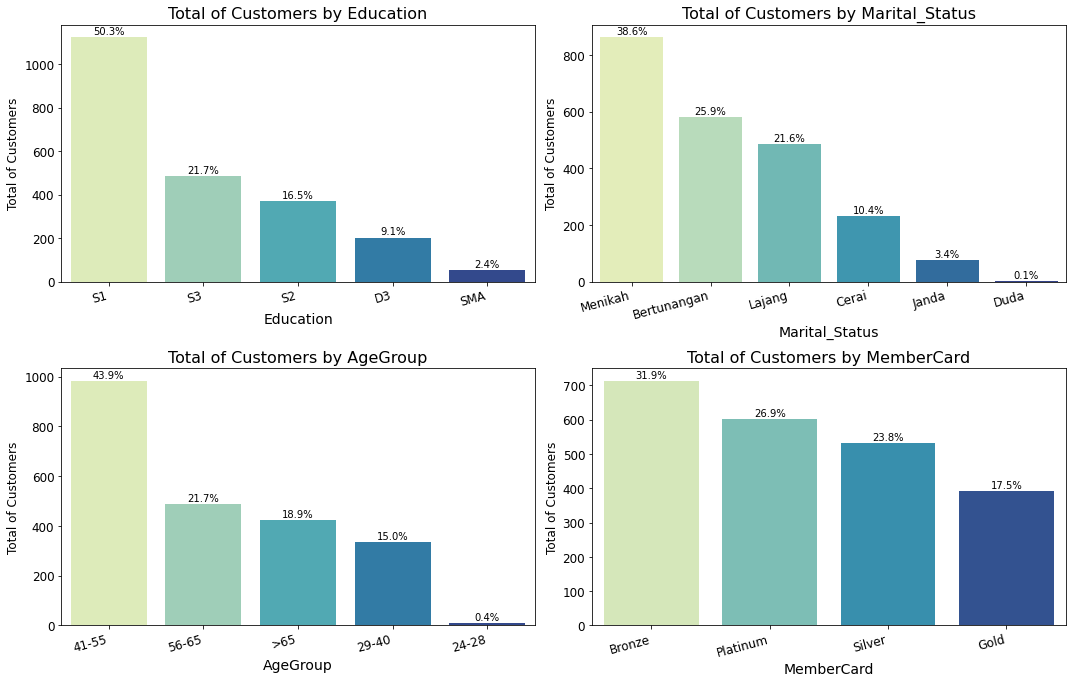

In [ ]:
plt.figure(figsize=(15, 28))
for i in range(0, len(cats)):
  plt.subplot (6, 2, i+1)
  ax = sns.countplot(data=dfe, x=dfe[cats[i]], order=dfe[cats[i]].value_counts().index.value_counts().index ,
                   palette= 'YlGnBu')
  plt.xticks(size=12)
  plt.xlabel(cats[i], size=14)
  plt.yticks(size=12)
  plt.ylabel('Total of Customers', size=12)
  plt.title('Total of Customers by ' + cats[i] , size=16)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
  total = len(dfe)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [ ]:
len(dfe)

2240

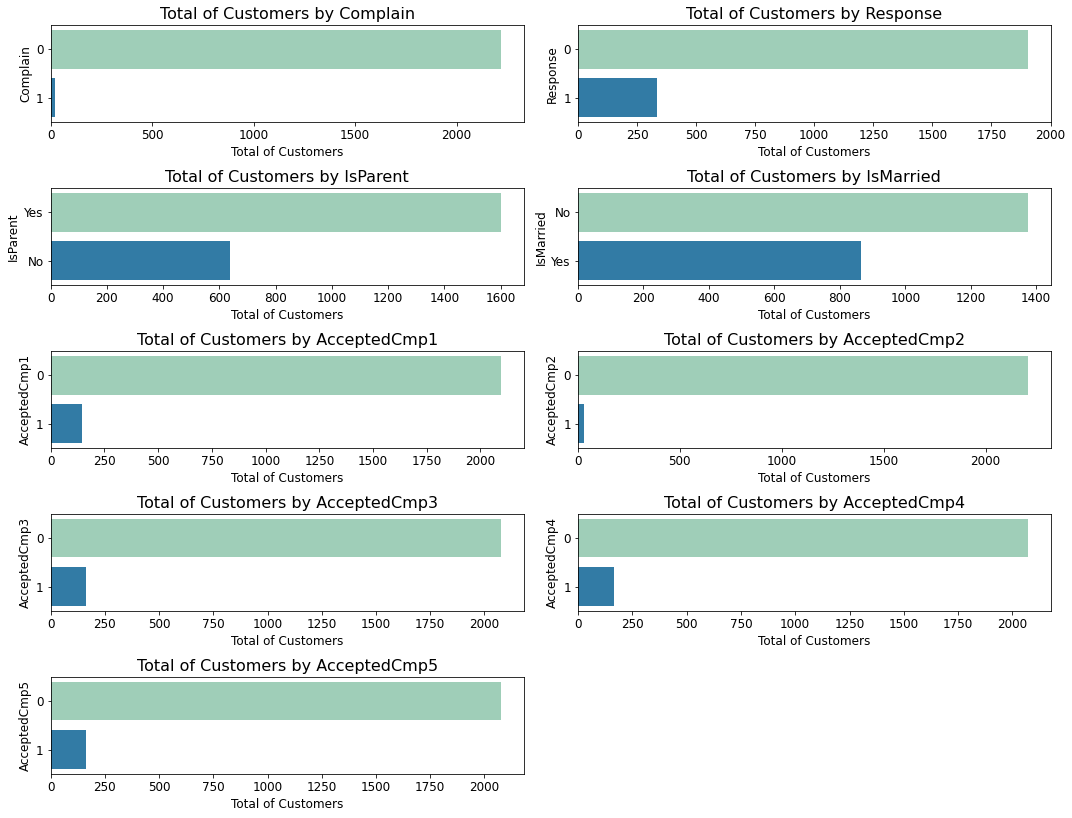

In [ ]:
flag = ['Complain', 'Response','IsParent','IsMarried','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
plt.figure(figsize=(15, 20))
for i in range(0, len(flag)):
  plt.subplot(len(flag), 2, i+1)
  sns.countplot(y = dfe[flag[i]], order=dfe[flag[i]].value_counts().index, palette = 'YlGnBu')
  plt.tight_layout()
  plt.yticks(size=12)
  plt.ylabel(flag[i], size=12)
  plt.xticks(size=12)
  plt.xlabel('Total of Customers', size=12)
  plt.title('Total of Customers by ' + flag[i] , size=16)
plt.tight_layout()
plt.show()

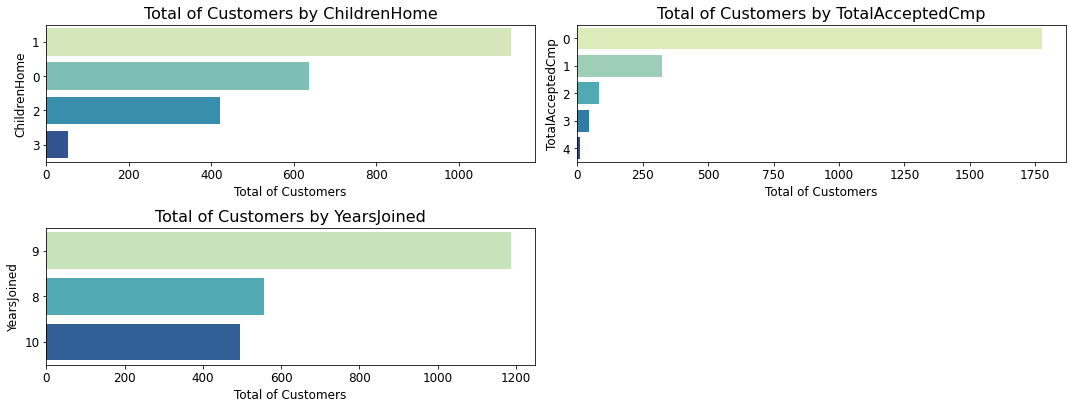

In [ ]:
etc = ['ChildrenHome','TotalAcceptedCmp','YearsJoined']
plt.figure(figsize=(15, 25))
for i in range(0, len(etc)):
  plt.subplot(len(flag), 2, i+1)
  sns.countplot(y = dfe[etc[i]], order=dfe[etc[i]].value_counts().index, palette = 'YlGnBu')
  plt.tight_layout()
  plt.yticks(size=12)
  plt.ylabel(etc[i], size=12)
  plt.xticks(size=12)
  plt.xlabel('Total of Customers', size=12)
  plt.title('Total of Customers by ' + etc[i] , size=16)
plt.tight_layout()
plt.show()

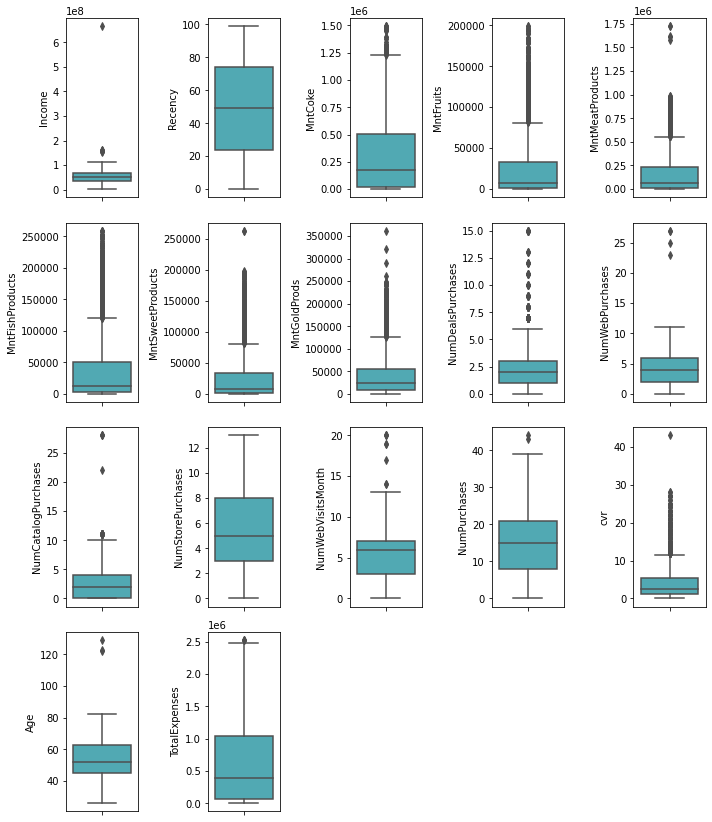

In [ ]:
plt.figure(figsize=(10, 20))
for i in range (0, len(nums)):
  plt.subplot(7, 5, i+1)
  sns.boxplot( y = dfe[nums[i]] , palette = 'YlGnBu', orient = 'v')
  plt.tight_layout()

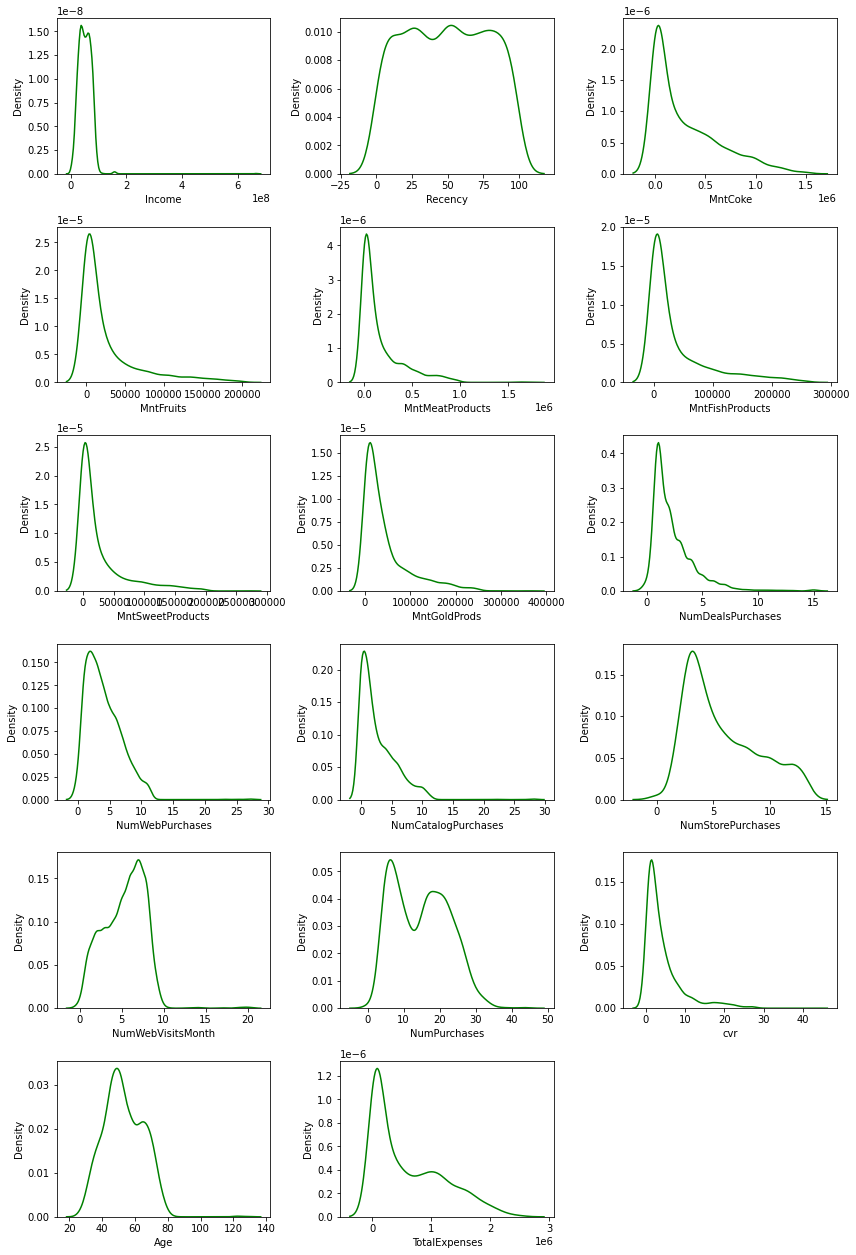

In [ ]:
features = nums
plt.figure(figsize=(12, 20))
for i in range(0, len(features)):
  plt.subplot(7 , 3, i+1)
  sns.kdeplot(x = dfe[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

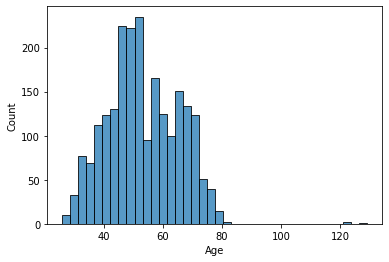

In [ ]:
sns.histplot(x = dfe['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


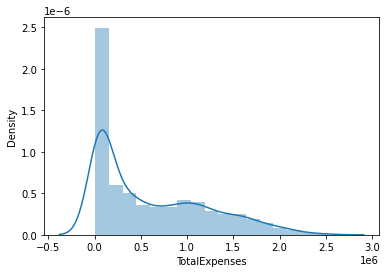

In [ ]:
sns.distplot(dfe['TotalExpenses'])

## Multivariate Analysis

### Correlation Heatmap

In [ ]:
from google.colab import files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

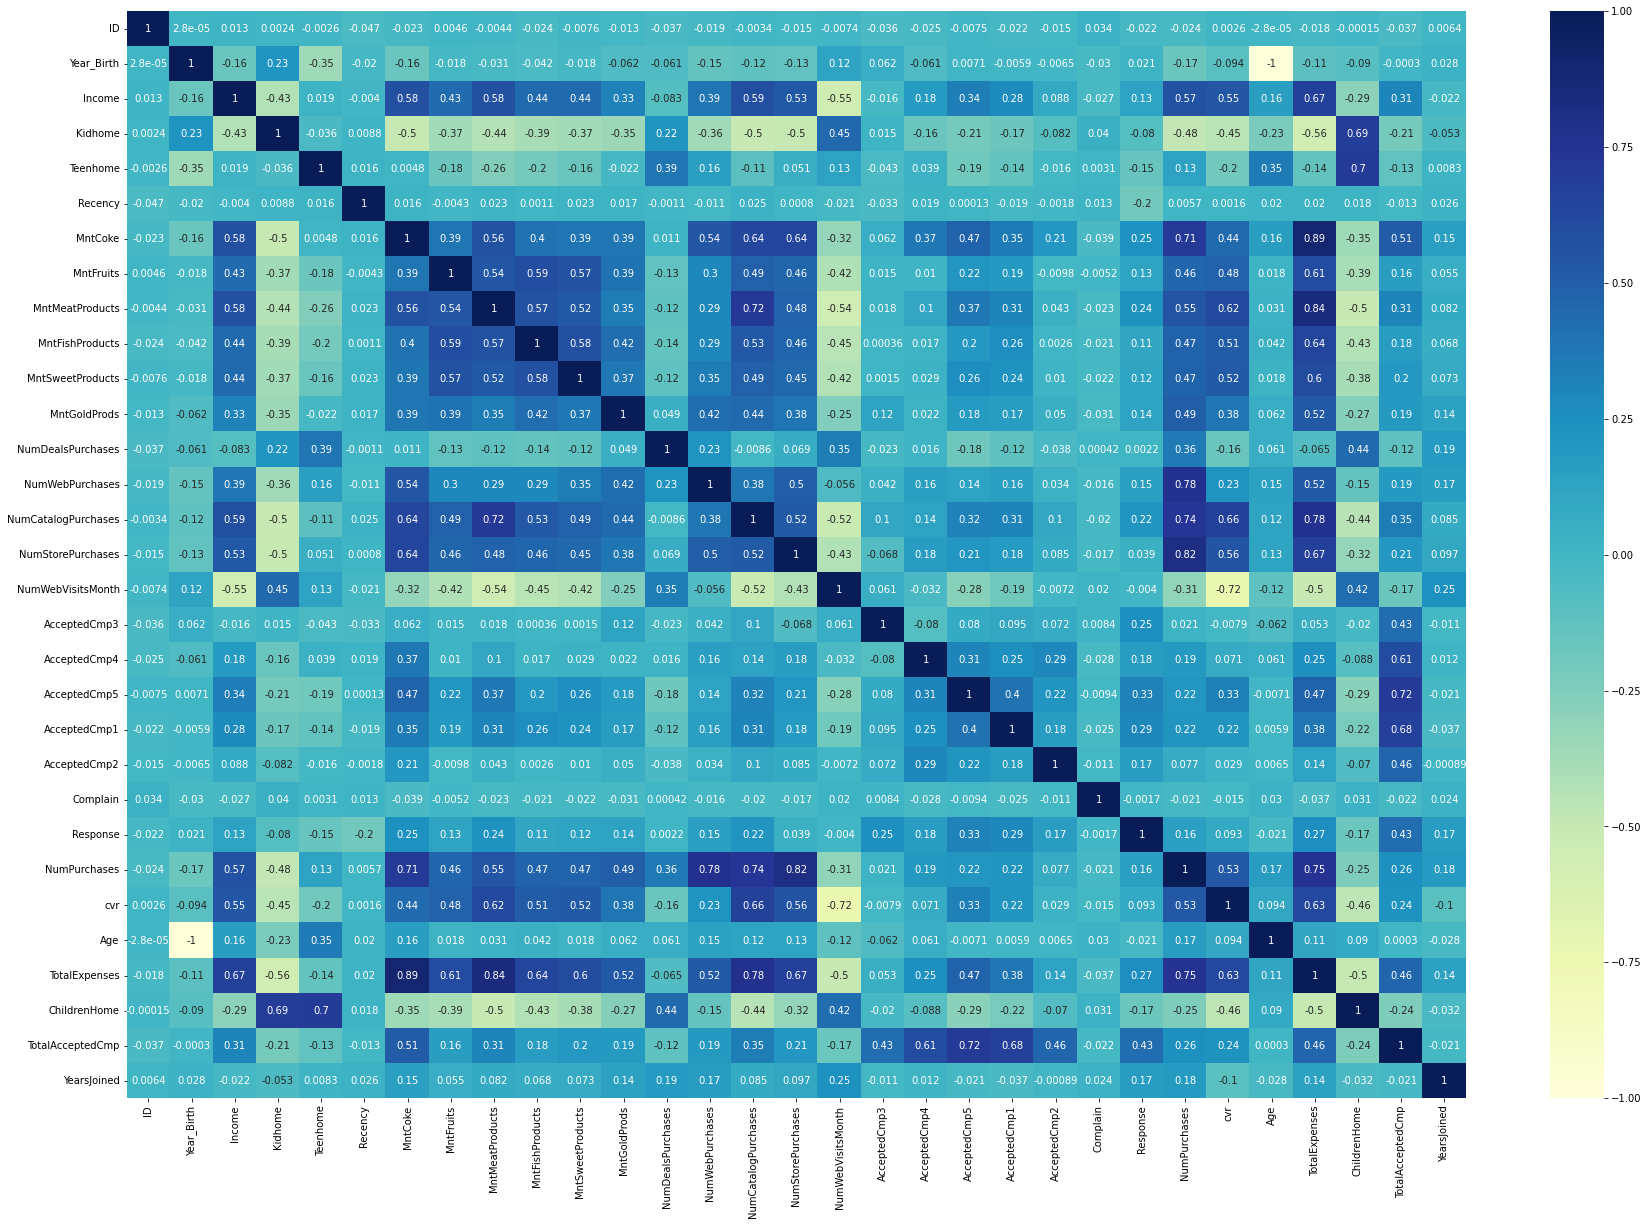

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(dfe.corr(), cmap = 'YlGnBu', annot = True)
plt.savefig('eda_corr_heatmap.png')
files.download('eda_corr_heatmap.png')

In [ ]:
dfe.corr()

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntCoke             -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.083101  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.387878 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.589162 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.529362 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.553088  0.447846  0.134884   
AcceptedCmp3        -0.036040    0.061774 -0.016174  0.014674 -0.042677   
AcceptedCmp4        -0.025387   -0.060510  0.184400 -0.161600  0.038886   
AcceptedCmp5        -0.007517    0.007123  0.335943 -0.205634 -0.191050   
AcceptedCmp1        -0.021614   -0.005930  0.276820 -0.172339 -0.140090   
AcceptedCmp2        -0.015061   -0.006539  0.087545 -0.081716 -0.015605   
Complain             0.033883   -0.030128 -0.027225  0.040207  0.003138   
Response            -0.021968    0.021325  0.133047 -0.080008 -0.154446   
NumPurchases        -0.023834   -0.168304  0.566873 -0.477895  0.133163   
cvr                  0.002640   -0.094215  0.545276 -0.445961 -0.198628   
Age                 -0.000028   -1.000000  0.161791 -0.230176  0.352111   
TotalExpenses       -0.018054   -0.111306  0.667576 -0.556669 -0.138384   
ChildrenHome        -0.000146   -0.090199 -0.293352  0.689971  0.698433   
TotalAcceptedCmp    -0.036883   -0.000301  0.308381 -0.211892 -0.127759   
YearsJoined          0.006414    0.028188 -0.022451 -0.053339  0.008260   

                      Recency   MntCoke  MntFruits  MntMeatProducts  \
ID                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntCoke              0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4         0.018826  0.373286   0.010152         0.102912   
AcceptedCmp5         0.000129  0.472613   0.215833         0.373769   
AcceptedCmp1        -0.019283  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.001781  0.205907  -0.009773         0.043

## Bivariate Analysis

### Conversion Rate

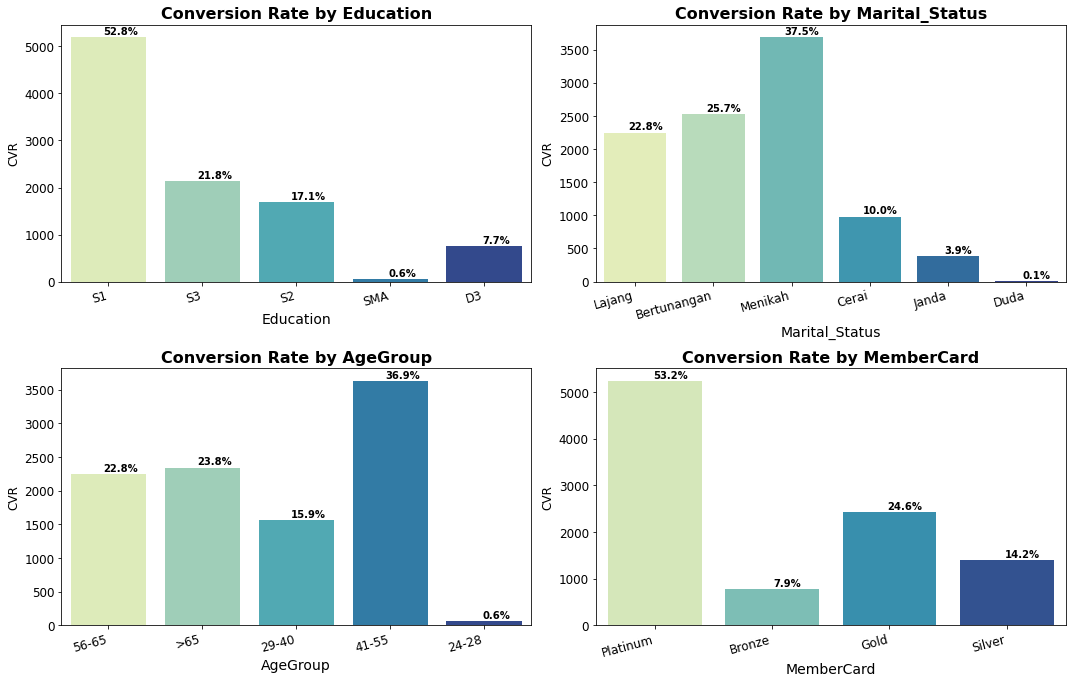

In [ ]:
plt.figure(figsize=(15, 28))
for i in range(0, len(cats)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[cats[i]], 
                   y = dfe['cvr'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.xticks(size=12)
  plt.xlabel(cats[i], size=14)
  plt.yticks(size=12)
  plt.ylabel('CVR', size=12)
  plt.title('Conversion Rate by ' + cats[i], size=16, weight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
  total = dfe['cvr'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

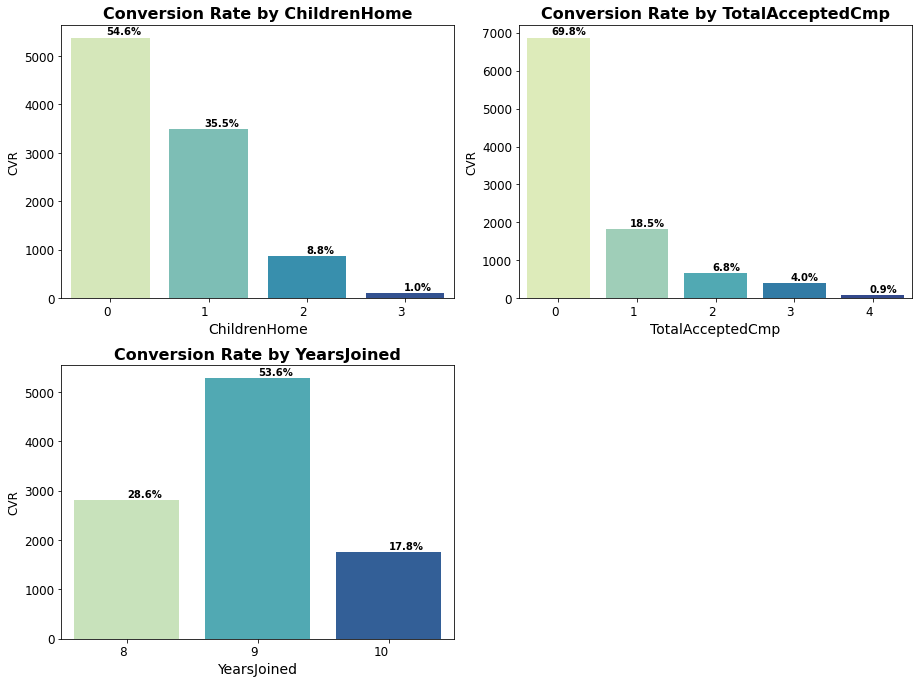

In [ ]:
plt.figure(figsize=(13, 28))
for i in range(0, len(etc)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[etc[i]], 
                   y = dfe['cvr'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.xticks(size=12)
  plt.xlabel(etc[i], size=14)
  plt.yticks(size=12)
  plt.ylabel('CVR', size=12)
  plt.title('Conversion Rate by ' + etc[i], size=16, weight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
  total = dfe['cvr'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

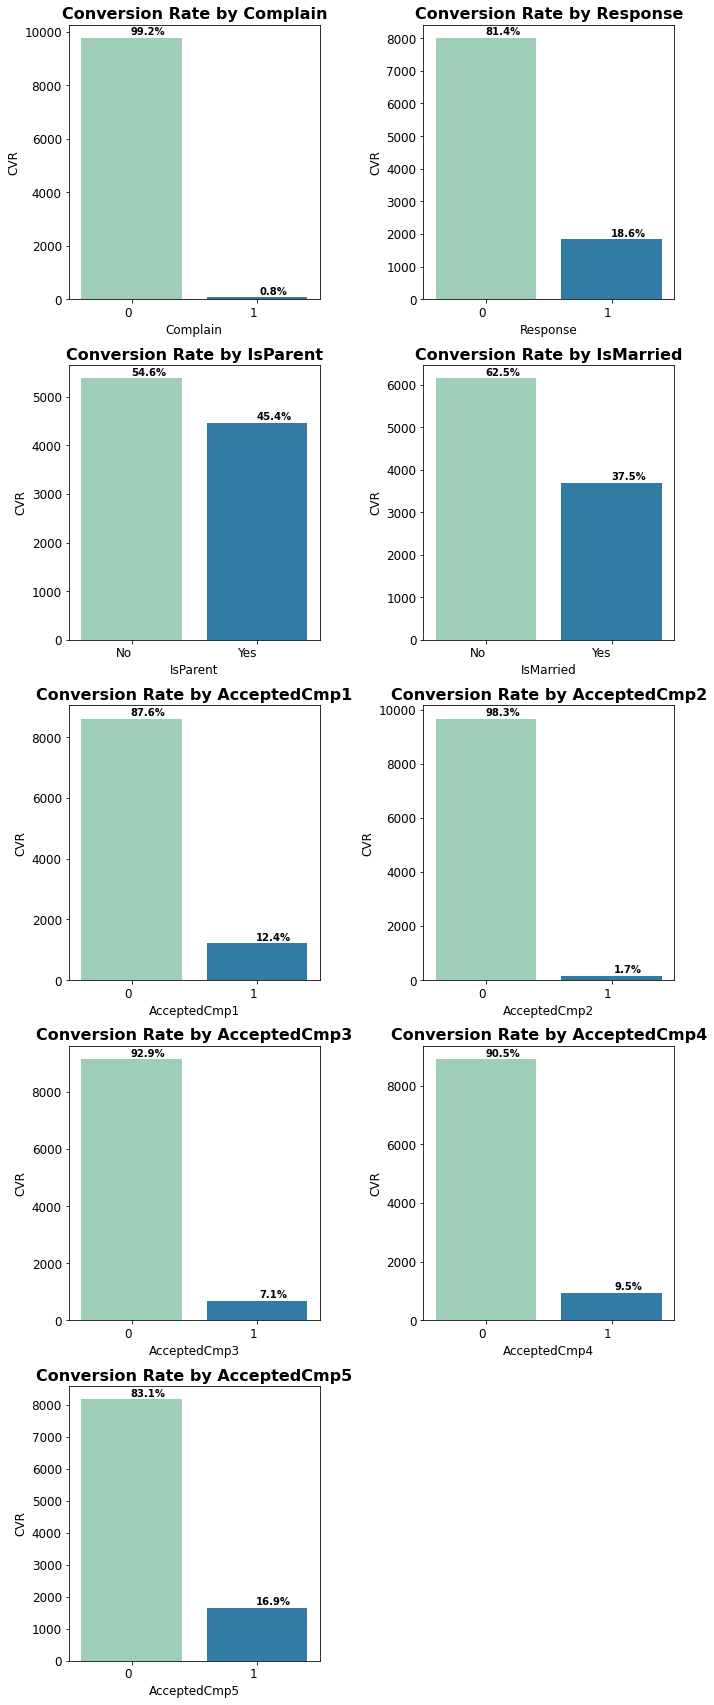

In [ ]:
plt.figure(figsize=(10, 28))
for i in range(0, len(flag)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[flag[i]], 
                   y = dfe['cvr'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.xticks(size=12)
  plt.xlabel(flag[i], size=12)
  plt.yticks(size=12)
  plt.ylabel('CVR', size=12)
  plt.title('Conversion Rate by ' + flag[i], size=16, weight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
  total = dfe['cvr'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

### Income

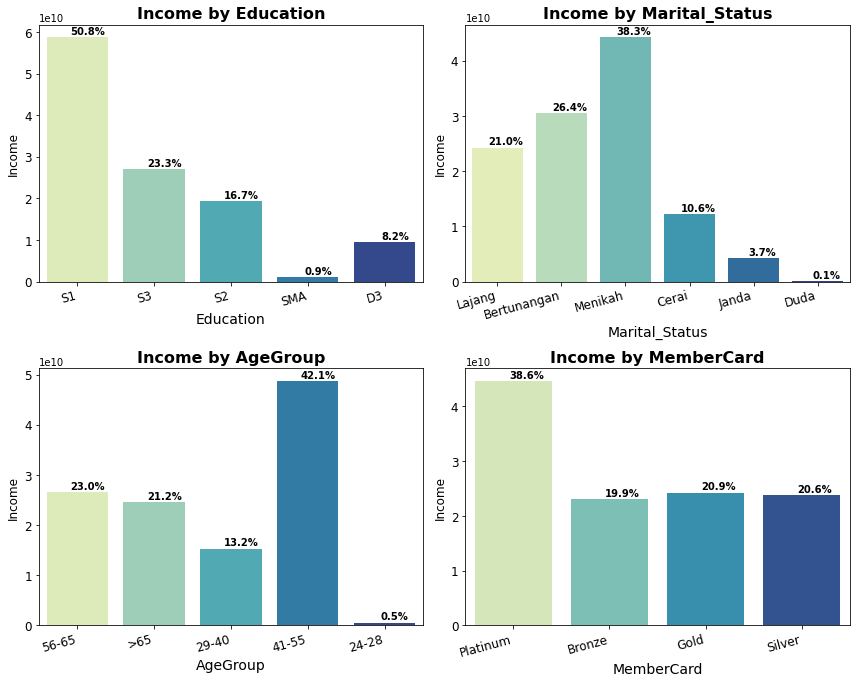

In [ ]:
plt.figure(figsize=(12, 28))
for i in range(0, len(cats)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[cats[i]], 
                   y = dfe['Income'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.xticks(size=12)
  plt.xlabel(cats[i], size=14)
  plt.yticks(size=12)
  plt.ylabel('Income', size=12)
  plt.title('Income by ' + cats[i], size=16, weight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
  total = dfe['Income'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

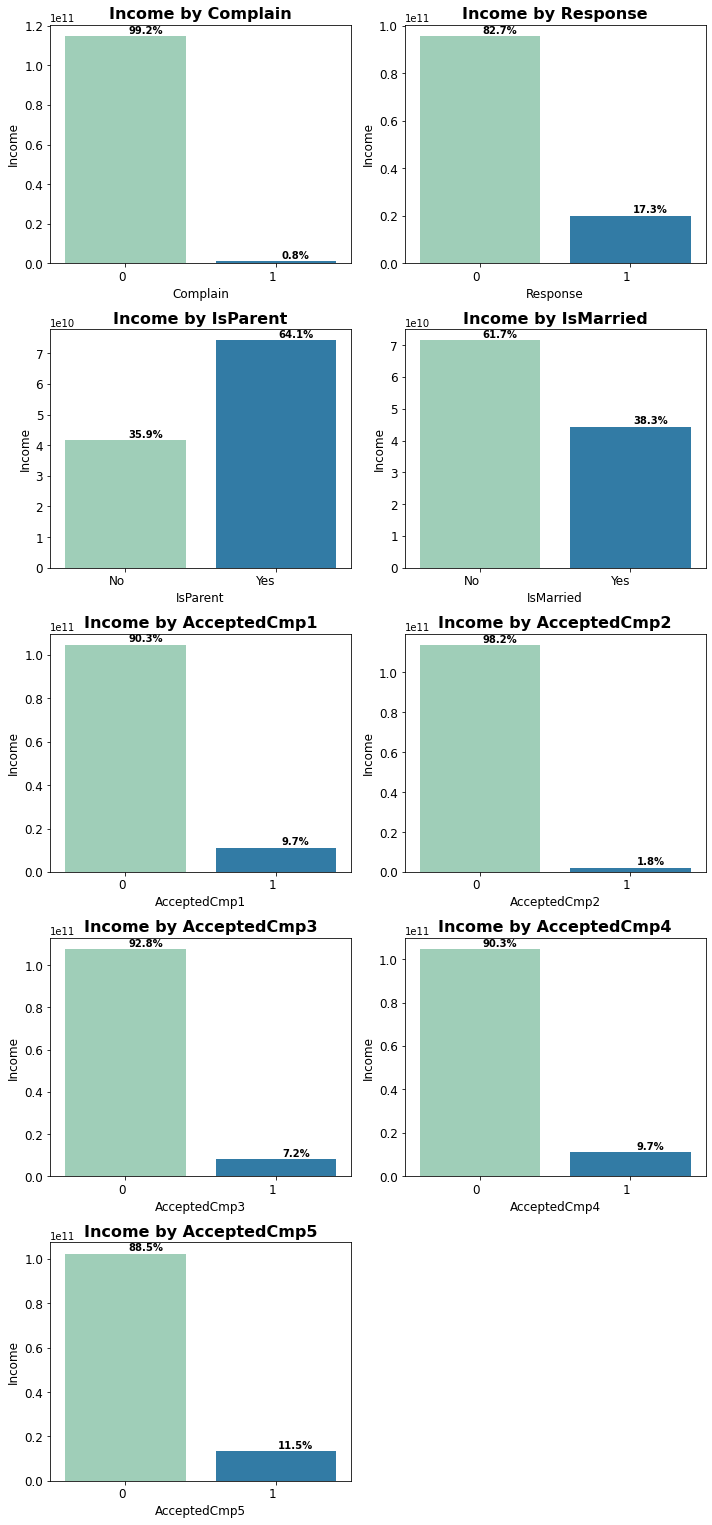

In [ ]:
plt.figure(figsize=(10, 25))
for i in range(0, len(flag)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[flag[i]], 
                   y = dfe['Income'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.tight_layout()
  plt.xticks(size=12)
  plt.xlabel(flag[i], size=12)
  plt.yticks(size=12)
  plt.ylabel('Income', size=12)
  plt.title('Income by ' + flag[i], size=16, weight='bold')
  plt.tight_layout()
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
  total = dfe['Income'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

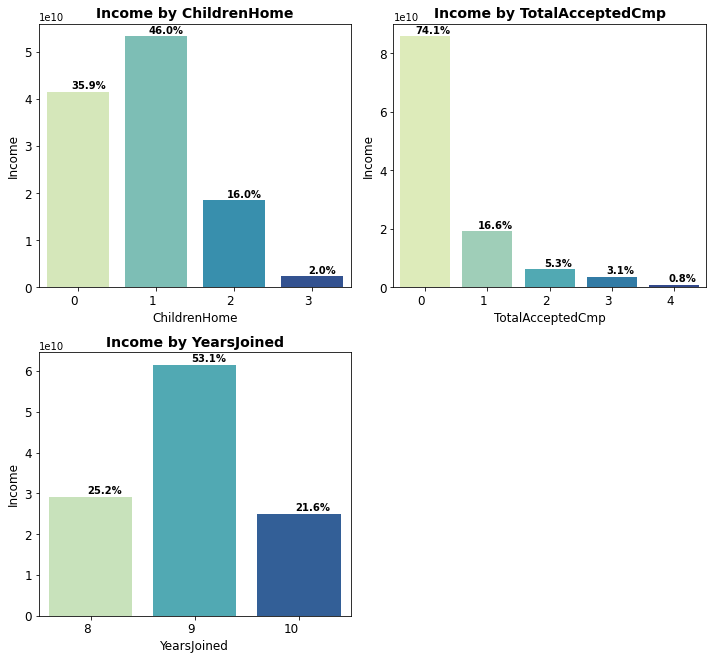

In [ ]:
plt.figure(figsize=(10, 27))
for i in range(0, len(etc)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[etc[i]], 
                   y = dfe['Income'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.tight_layout()
  plt.xticks(size=12)
  plt.xlabel(etc[i], size=12)
  plt.yticks(size=12)
  plt.ylabel('Income', size=12)
  plt.title('Income by ' + etc[i], size=14, weight='bold')
  plt.tight_layout()
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
  total = dfe['Income'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

### Expenses

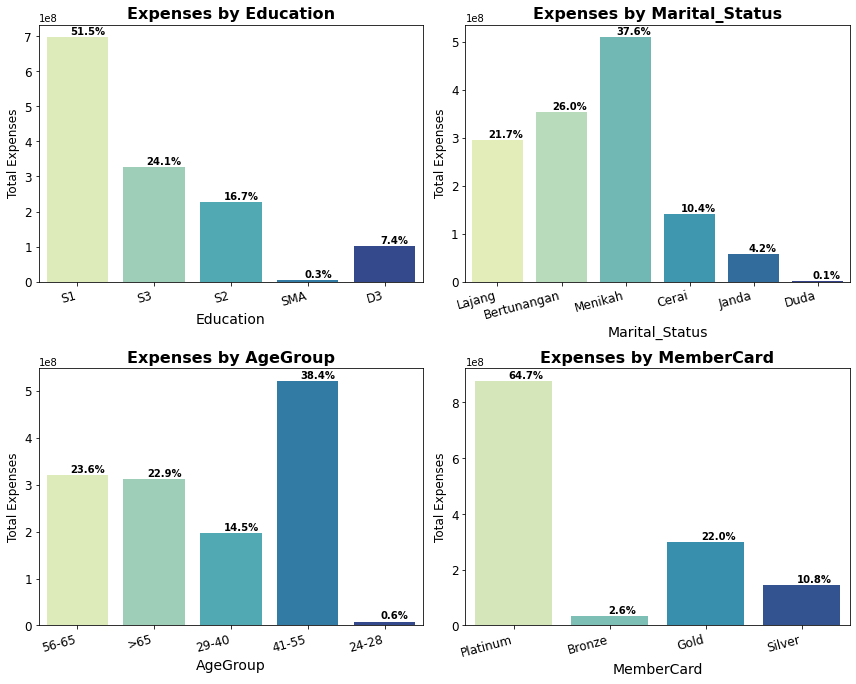

In [ ]:
plt.figure(figsize=(12, 28))
for i in range(0, len(cats)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[cats[i]], 
                   y = dfe['TotalExpenses'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.xticks(size=12)
  plt.xlabel(cats[i], size=14)
  plt.yticks(size=12)
  plt.ylabel('Total Expenses', size=12)
  plt.title('Expenses by ' + cats[i], size=16, weight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
  total = dfe['TotalExpenses'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

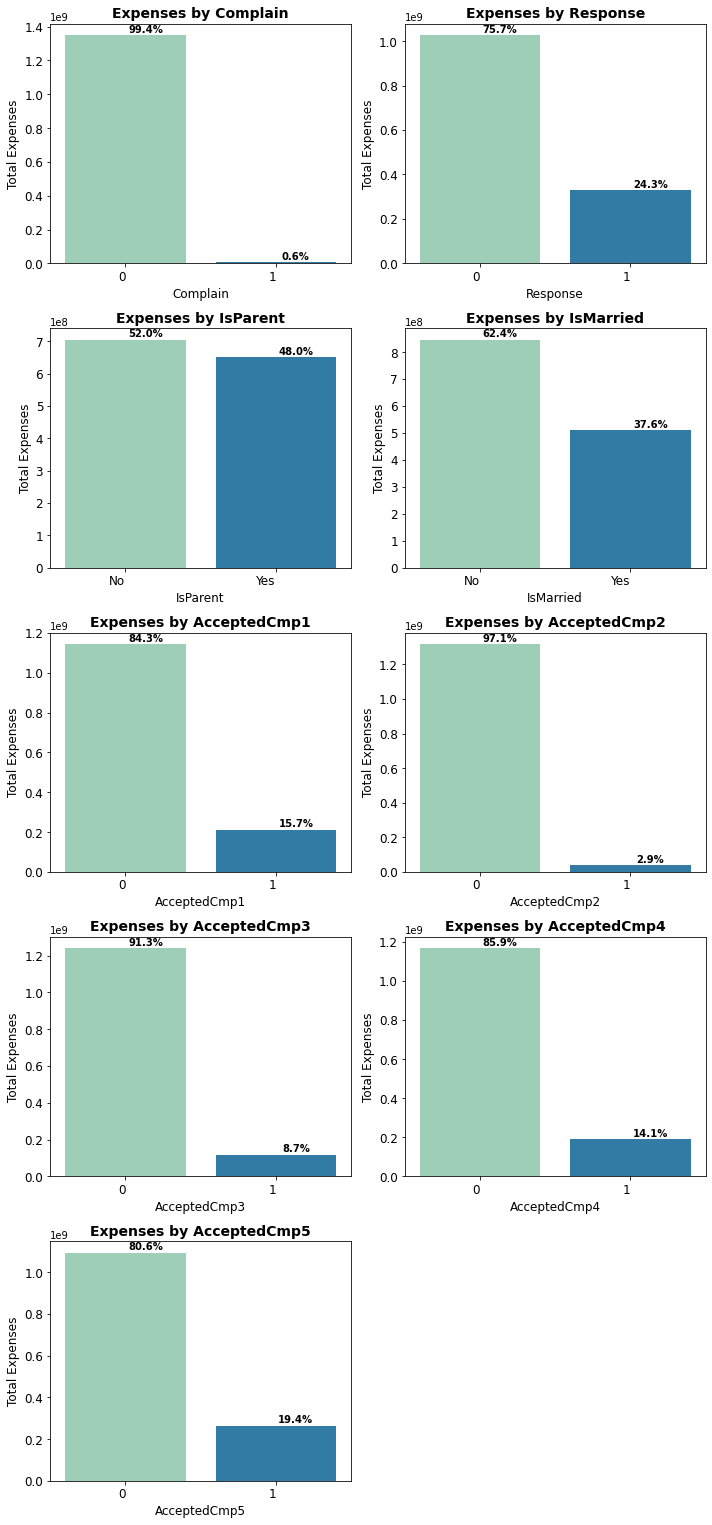

In [ ]:
plt.figure(figsize=(10, 25))
for i in range(0, len(flag)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[flag[i]], 
                   y = dfe['TotalExpenses'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.tight_layout()
  plt.xticks(size=12)
  plt.xlabel(flag[i], size=12)
  plt.yticks(size=12)
  plt.ylabel('Total Expenses', size=12)
  plt.title('Expenses by ' + flag[i], size=14, weight='bold')
  plt.tight_layout()
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
  total = dfe['TotalExpenses'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

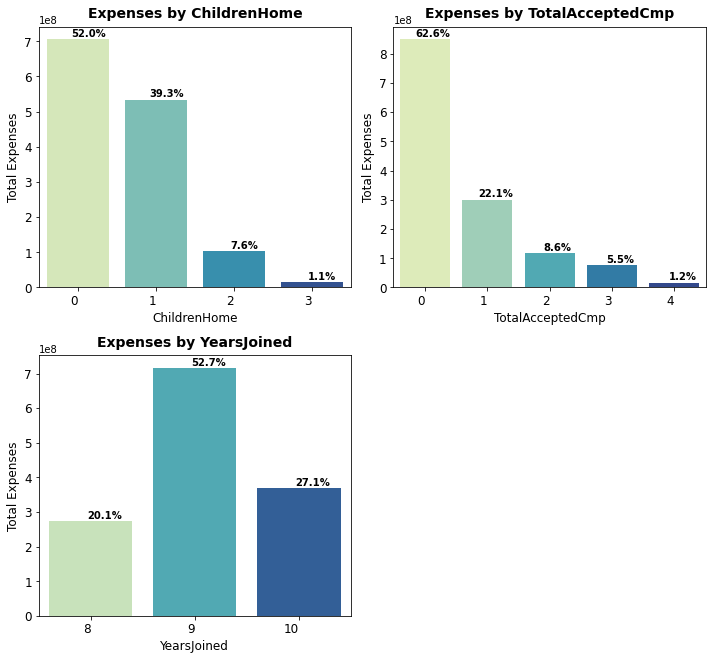

In [ ]:
plt.figure(figsize=(10, 27))
for i in range(0, len(etc)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe[etc[i]], 
                   y = dfe['TotalExpenses'], 
                   ci = 0,
                   estimator = np.sum,
                   palette= 'YlGnBu')
  plt.tight_layout()
  plt.xticks(size=12)
  plt.xlabel(etc[i], size=12)
  plt.yticks(size=12)
  plt.ylabel('Total Expenses', size=12)
  plt.title('Expenses by ' + etc[i], size=14, weight='bold', ha='center',  va = 'bottom')
  plt.tight_layout()
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
  total = dfe['TotalExpenses'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

### CVR VS Income

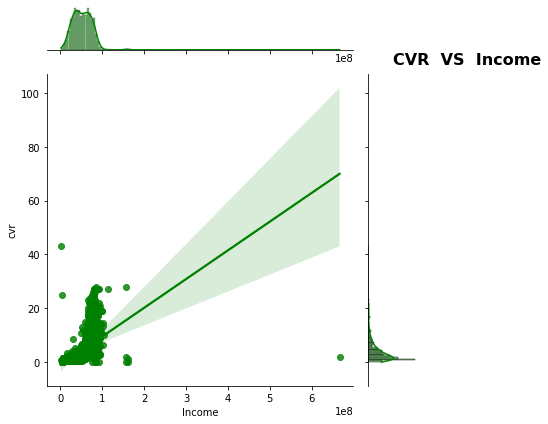

In [ ]:
sns.jointplot(x = "Income", y = "cvr",
              kind = "reg", data = dfe,  color = 'green')
plt.tight_layout()
plt.title('CVR  ' + 'VS  ' + 'Income', size=16, weight='bold', ha='left', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

### CVR VS Total Expenses

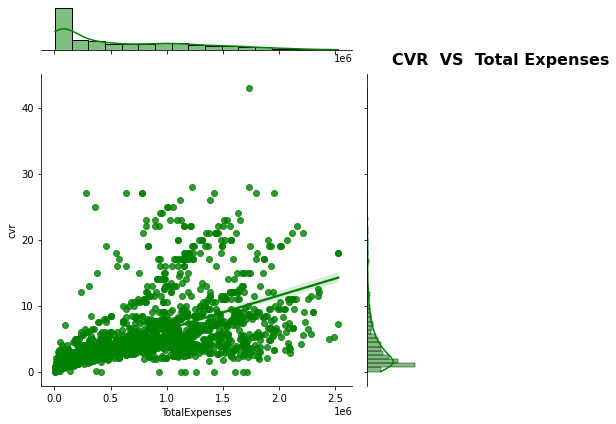

In [ ]:
sns.jointplot(x = "TotalExpenses", y = "cvr",
              kind = "reg", data = dfe,  color = 'green')
plt.tight_layout()
plt.title('CVR  ' + 'VS  ' + 'Total Expenses', size=16, weight='bold', ha='left', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

### Income VS Total Expenses

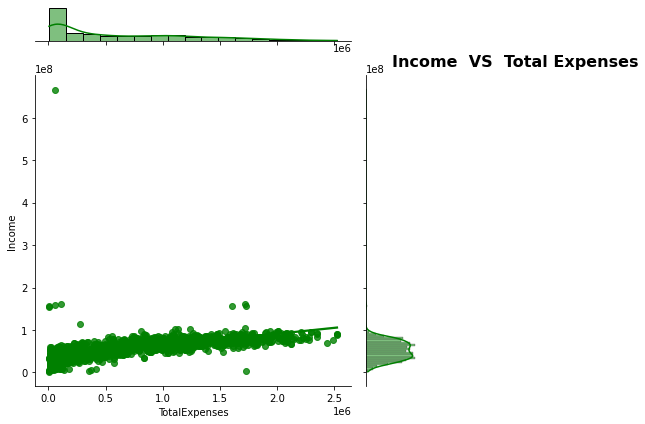

In [ ]:
sns.jointplot(x = "TotalExpenses", y = "Income",
              kind = "reg", data = dfe,  color = 'green')
plt.tight_layout()
plt.title('Income  ' + 'VS  ' + 'Total Expenses', size=16, weight='bold', ha='left', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

# Data Cleaning & Preprocessing

## Handling Missing Value

In [ ]:
dfe.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
NumPurchases            0
cvr                     2
Age                     0
AgeGroup                0
TotalExpenses           0
ChildrenHome            0
TotalAcceptedCmp        0
YearsJoined             0
MemberCard              0
IsParent                0
IsMarried               0
dtype: int64

In [ ]:
dfe =  dfe.dropna()
dfe.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
NumPurchases           0
cvr                    0
Age                    0
AgeGroup               0
TotalExpenses          0
ChildrenHome           0
TotalAcceptedCmp       0
YearsJoined            0
MemberCard             0
IsParent               0
IsMarried              0
dtype: int64

## Handling Duplicated Data

In [ ]:
dfe.duplicated().sum()

0

In [ ]:
dfe = dfe.drop_duplicates()

In [ ]:
dfe.duplicated().sum()

0

## Drop Unnecessary Feature

I've Dropped some feature while doing EDA and Feature Engineering, These are features dropped:
* Unnamed: 0
* ID
* Year_Birth
* Z_CostContact
* Z_Revenue

In [ ]:
dfe = dfe.drop(['Teenhome', 'Kidhome','Marital_Status','Dt_Customer'], axis = 1)
dfe.head()

ID  Year_Birth Education      Income  Recency  MntCoke  MntFruits  \
0  5524        1957        S1  58138000.0       58   635000      88000   
1  2174        1954        S1  46344000.0       38    11000       1000   
2  4141        1965        S1  71613000.0       26   426000      49000   
3  6182        1984        S1  26646000.0       26    11000       4000   
4  5324        1981        S3  58293000.0       94   173000      43000   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0           546000           172000             88000         88000   
1             6000             2000              1000          6000   
2           127000           111000             21000         42000   
3            20000            10000              3000          5000   
4           118000            46000             27000         15000   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  NumPurchases       cvr  Age AgeGroup  \
0             0         0         1            25  3.571429   65    56-65   
1             0         0         0             6  1.200000   68      >65   
2             0         0         0            21  5.250000   57    56-65   
3             0         0         0             8  1.333333   38    29-40   
4             0         0         0            19  3.800000   41    41-55   

   TotalExpenses  ChildrenHome  TotalAcceptedCmp  YearsJoined MemberCard  \
0        1617000             0                 0           10   Platinum   
1          27000             2                 0            8     Bronze   
2         776000             0                 0            9       Gold   
3          53000             1                 0            8     Bronze   
4         422000             1                 0            8     Silver   

  IsParent IsMarried  
0       No        No  
1      Yes        No  
2       No        No  
3      Yes        No  
4      Yes       Yes

## Pair Plot

In [ ]:
nums = []   #membuat list numerical column
for i in dfe.columns:  #untuk setiap i sebagai kolom yang ada di df
    if dfe[i].dtypes == 'float' or dfe[i].dtypes == 'int' :  #jika kolom di df bertipe object maka dianggap sebagai categorical column
        nums.append(i)
nums.remove('Response')
nums.remove('Complain')
nums.remove('AcceptedCmp1')
nums.remove('AcceptedCmp2')
nums.remove('AcceptedCmp3')
nums.remove('AcceptedCmp4')
nums.remove('AcceptedCmp5')
nums.remove('ChildrenHome')
nums.remove('TotalAcceptedCmp')
nums.remove('YearsJoined')
nums

['ID',
 'Year_Birth',
 'Income',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'NumPurchases',
 'cvr',
 'Age',
 'TotalExpenses']

In [ ]:
# sns.pairplot(df[nums], diag_kind = 'kde')

## Handling Outlier

Before Handling Outlier

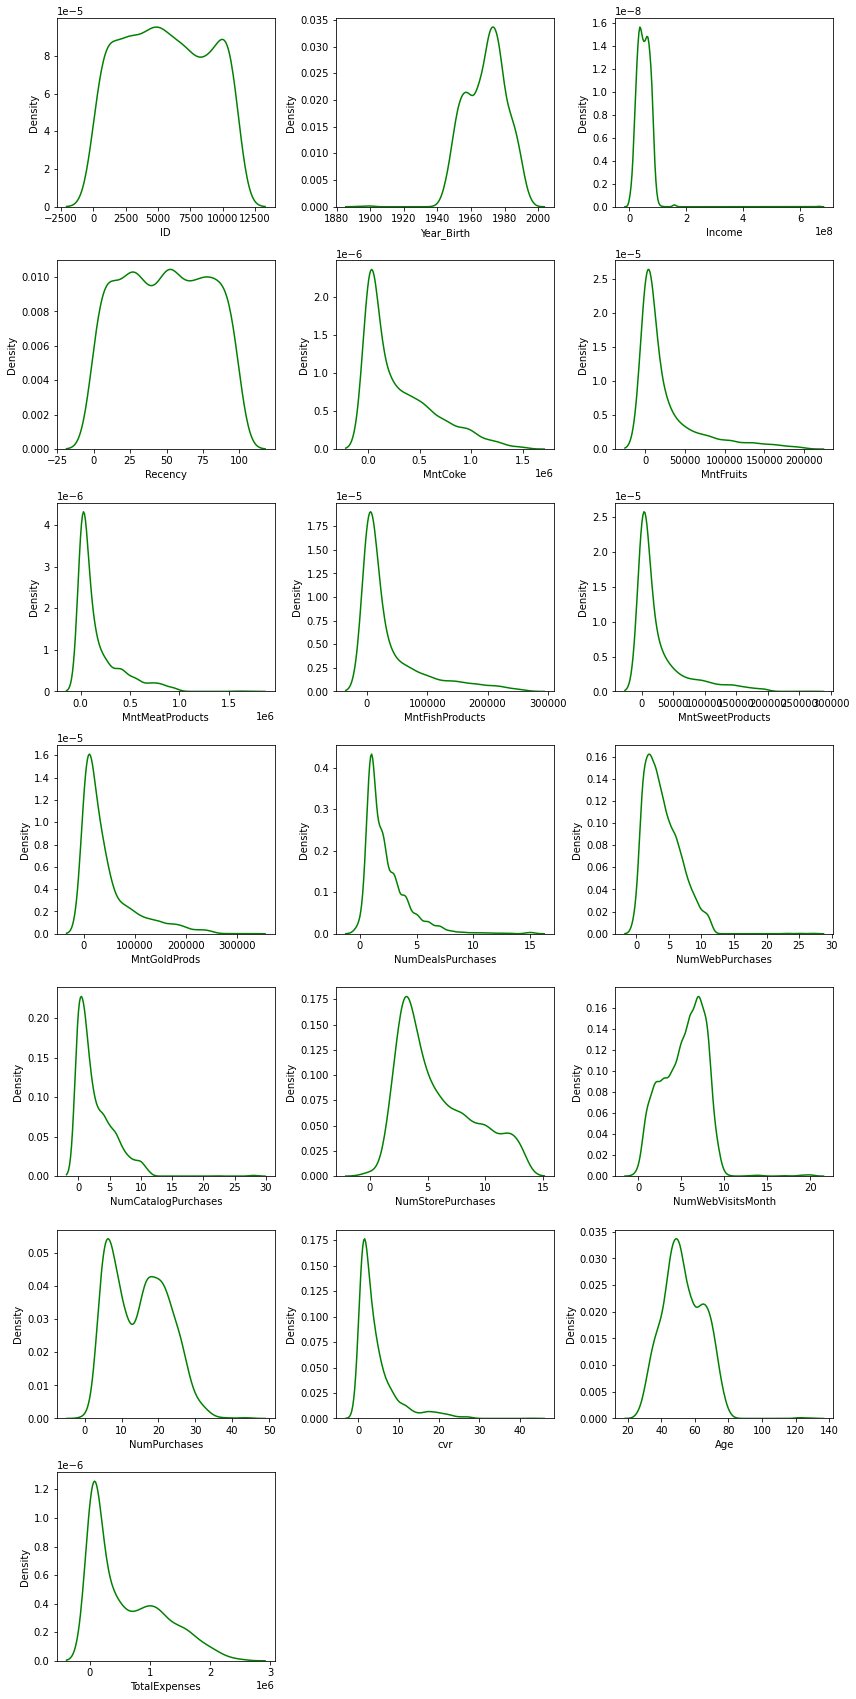

In [ ]:
features = nums
plt.figure(figsize=(12, 30))
for i in range(0, len(features)):
  plt.subplot(9 , 3, i+1)
  sns.kdeplot(x = dfe[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(dfe)}')

filtered_entries = np.array([True] * len(dfe))

for col in nums:
    zscore = abs(stats.zscore(dfe[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfe = dfe[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfe)}')

Jumlah baris sebelum memfilter outlier: 2214
Jumlah baris setelah memfilter outlier: 1911


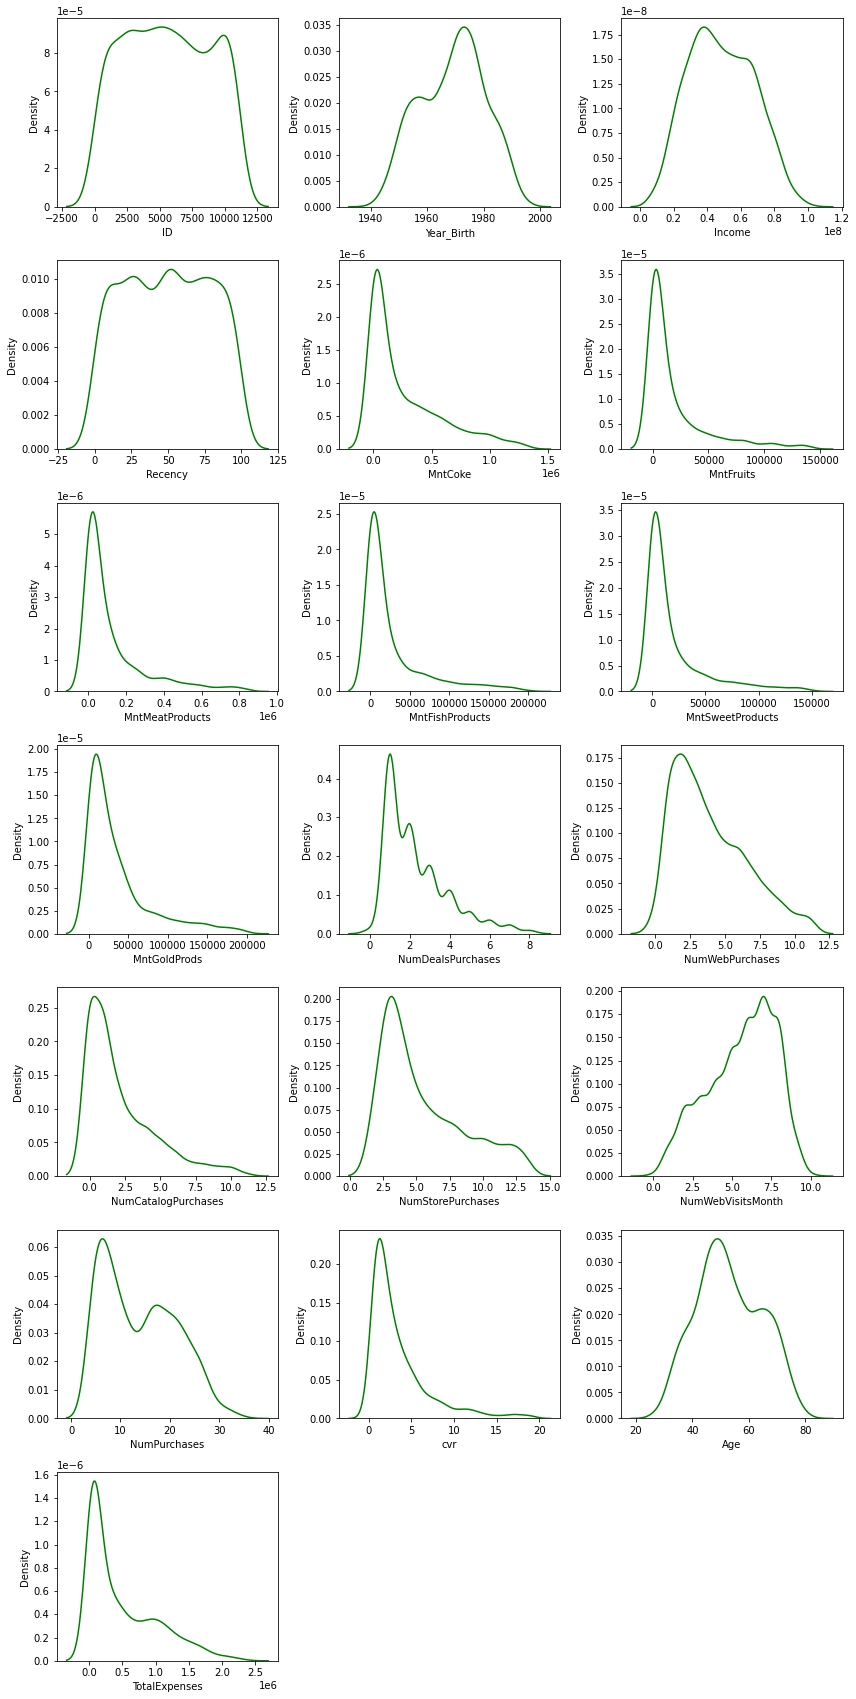

In [ ]:
features = nums
plt.figure(figsize=(12, 30))
for i in range(0, len(features)):
  plt.subplot(9 , 3, i+1)
  sns.kdeplot(x = dfe[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

Dataset Cleaned

In [ ]:
dfc = dfe.copy()

# Feature Selection

In [ ]:
dfe.describe().transpose()

count          mean           std        min  \
ID                   1911.0  5.599226e+03  3.246694e+03        1.0   
Year_Birth           1911.0  1.969016e+03  1.154049e+01     1940.0   
Income               1911.0  4.850318e+07  1.922322e+07  7500000.0   
Recency              1911.0  4.922658e+01  2.896489e+01        0.0   
MntCoke              1911.0  2.658603e+05  3.178376e+05        0.0   
MntFruits            1911.0  1.891732e+04  2.882866e+04        0.0   
MntMeatProducts      1911.0  1.240837e+05  1.727273e+05        0.0   
MntFishProducts      1911.0  2.729775e+04  4.076830e+04        0.0   
MntSweetProducts     1911.0  1.953532e+04  2.983053e+04        0.0   
MntGoldProds         1911.0  3.610727e+04  4.179826e+04        0.0   
NumDealsPurchases    1911.0  2.324437e+00  1.587723e+00        0.0   
NumWebPurchases      1911.0  3.918367e+00  2.638743e+00        0.0   
NumCatalogPurchases  1911.0  2.177917e+00  2.457759e+00        0.0   
NumStorePurchases    1911.0  5.481423e+00  3.116842e+00        2.0   
NumWebVisitsMonth    1911.0  5.600733e+00  2.116547e+00        0.0   
AcceptedCmp3         1911.0  6.959707e-02  2.545333e-01        0.0   
AcceptedCmp4         1911.0  7.064364e-02  2.562957e-01        0.0   
AcceptedCmp5         1911.0  4.866562e-02  2.152243e-01        0.0   
AcceptedCmp1         1911.0  4.238619e-02  2.015213e-01        0.0   
AcceptedCmp2         1911.0  1.151230e-02  1.067039e-01        0.0   
Complain             1911.0  1.046572e-02  1.017920e-01        0.0   
Response             1911.0  1.308216e-01  3.372934e-01        0.0   
NumPurchases         1911.0  1.390215e+01  7.413469e+00        4.0   
cvr                  1911.0  3.471050e+00  3.479458e+00        0.0   
Age                  1911.0  5.298430e+01  1.154049e+01       26.0   
TotalExpenses        1911.0  4.918017e+05  5.276866e+05     8000.0   
ChildrenHome         1911.0  1.029827e+00  7.233213e-01        0.0   
TotalAcceptedCmp     1911.0  2.428048e-01  5.946263e-01        0.0   
YearsJoined          1911.0  8.967033e+00  6.814379e-01        8.0   

                              25%          50%           75%          max  
ID                   2.814500e+03      5519.00  8.425000e+03      11191.0  
Year_Birth           1.960000e+03      1970.00  1.977000e+03       1996.0  
Income               3.358300e+07  47025000.00  6.373500e+07  101970000.0  
Recency              2.400000e+01        50.00  7.400000e+01         99.0  
MntCoke              1.900000e+04    123000.00  4.290000e+05    1311000.0  
MntFruits            1.000000e+03      6000.00  2.300000e+04     142000.0  
MntMeatProducts      1.300000e+04     48000.00  1.555000e+05     838000.0  
MntFishProducts      2.000000e+03     10000.00  3.300000e+04     201000.0  
MntSweetProducts     1.000000e+03      6000.00  2.400000e+04     150000.0  
MntGoldProds         7.000000e+03     20000.00  4.600000e+04     199000.0  
NumDealsPurchases    1.000000e+00         2.00  3.000000e+00          8.0  
NumWebPurchases      2.000000e+00         3.00  6.000000e+00         11.0  
NumCatalogPurchases  0.000000e+00         1.00  3.000000e+00         11.0  
NumStorePurchases    3.000000e+00         4.00  7.000000e+00         13.0  
NumWebVisitsMonth    4.000000e+00         6.00  7.000000e+00         10.0  
AcceptedCmp3         0.000000e+00         0.00  0.000000e+00          1.0  
AcceptedCmp4         0.000000e+00         0.00  0.000000e+00          1.0  
AcceptedCmp5         0.000000e+00         0.00  0.000000e+00          1.0  
AcceptedCmp1         0.000000e+00         0.00  0.000000e+00          1.0  
AcceptedCmp2         0.000000e+00         0.00  0.000000e+00          1.0  
Complain             0.000000e+00         0.00  0.000000e+00          1.0  
Response             0.000000e+00         0.00  0.000000e+00          1.0  
NumPurchases         7.000000e+00        13.00  2.000000e+01         35.0  
cvr                  1.142857e+00         2.25  4.464286e+00         19.0  
Age                  

In [ ]:
# df_cl= dfe.drop([''])

In [ ]:
sel = ['Recency', 'NumPurchases','cvr', 'Age', 'TotalExpenses','NumWebVisitsMonth']
dfc = dfe[sel]
dfc.describe().transpose()

count           mean            std     min           25%  \
Recency            1911.0      49.226583      28.964890     0.0     24.000000   
NumPurchases       1911.0      13.902145       7.413469     4.0      7.000000   
cvr                1911.0       3.471050       3.479458     0.0      1.142857   
Age                1911.0      52.984301      11.540494    26.0     45.000000   
TotalExpenses      1911.0  491801.674516  527686.608681  8000.0  61000.000000   
NumWebVisitsMonth  1911.0       5.600733       2.116547     0.0      4.000000   

                         50%            75%        max  
Recency                50.00      74.000000       99.0  
NumPurchases           13.00      20.000000       35.0  
cvr                     2.25       4.464286       19.0  
Age                    52.00      62.000000       82.0  
TotalExpenses      266000.00  851500.000000  2349000.0  
NumWebVisitsMonth       6.00       7.000000       10.0

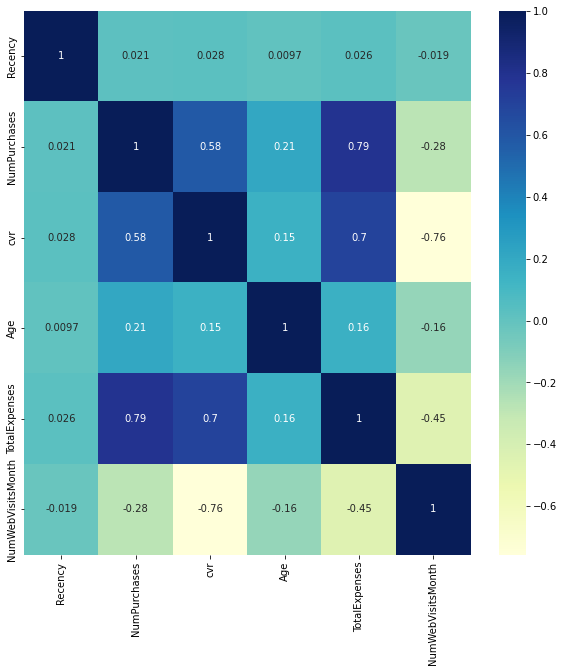

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dfc.corr(), cmap = 'YlGnBu', annot = True);

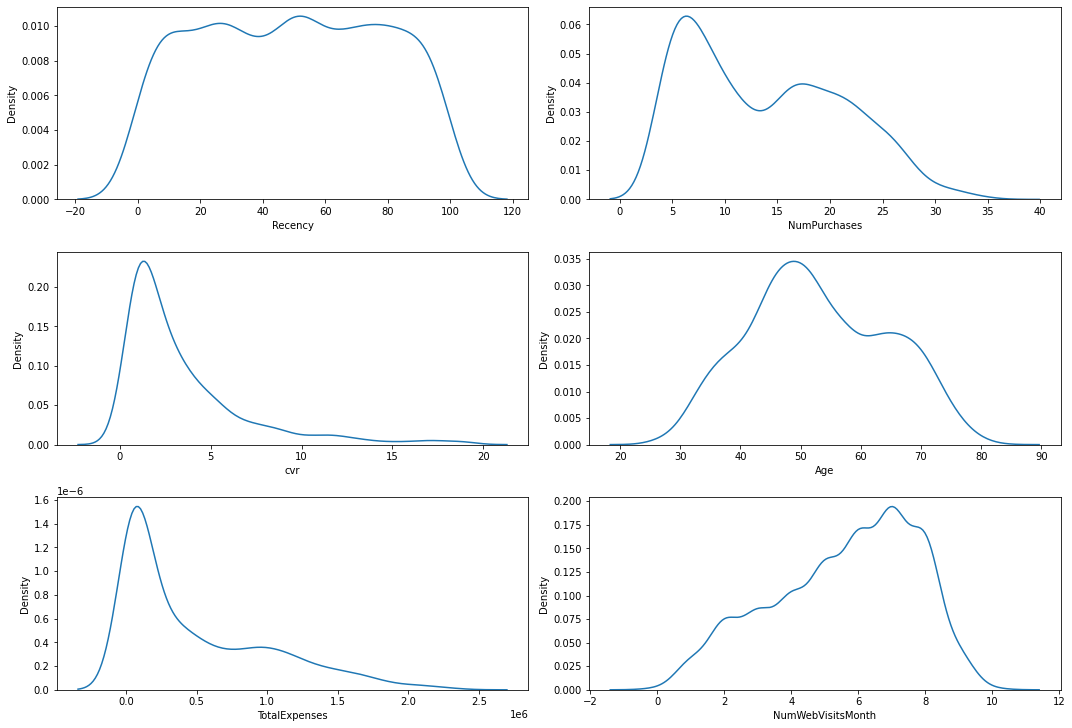

In [ ]:
plt.figure(figsize= (15, 20))
for i in range(len(sel)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = dfc[sel[i]])
    plt.tight_layout()

# Feature Transformation

## Dataframe Log Distribution

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


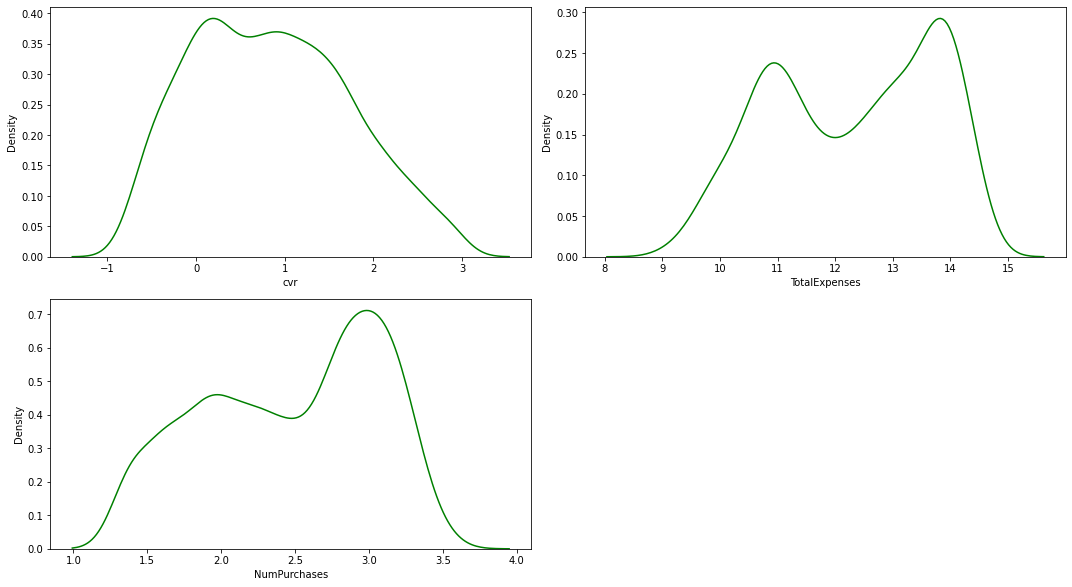

In [ ]:
log = ['cvr','TotalExpenses', 'NumPurchases']
plt.figure(figsize=(15, 20))
for i in range(0, len(log)):
  plt.subplot(5 , 2 , i+1)
  sns.kdeplot(x = np.log(dfc[log[i]]), color = 'green')
  plt.xlabel(log[i])
  plt.tight_layout()

In [ ]:
dfc_log = dfc.copy()
dfc_log['TotalExpenses'] = np.log(dfc['TotalExpenses'])
dfc_log.describe()

Recency  NumPurchases          cvr          Age  TotalExpenses  \
count  1911.000000   1911.000000  1911.000000  1911.000000    1911.000000   
mean     49.226583     13.902145     3.471050    52.984301      12.301757   
std      28.964890      7.413469     3.479458    11.540494       1.434485   
min       0.000000      4.000000     0.000000    26.000000       8.987197   
25%      24.000000      7.000000     1.142857    45.000000      11.018629   
50%      50.000000     13.000000     2.250000    52.000000      12.491252   
75%      74.000000     20.000000     4.464286    62.000000      13.654750   
max      99.000000     35.000000    19.000000    82.000000      14.669500   

       NumWebVisitsMonth  
count        1911.000000  
mean            5.600733  
std             2.116547  
min             0.000000  
25%             4.000000  
50%             6.000000  
75%             7.000000  
max            10.000000

# Feature Encoding

In [ ]:
df_enc = dfe.copy()

In [ ]:
cats = []   #membuat list categorical colums
for i in dfe.columns:  #untuk setiap i sebagai kolom yang ada di df
    if dfe[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cats.append(i)
cats

['Education', 'AgeGroup', 'MemberCard', 'IsParent', 'IsMarried']

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in cats:
    df_enc[i]=df_enc[[i]].apply(enc.fit_transform)

In [ ]:
df_enc.head()

ID  Year_Birth  Education      Income  Recency  MntCoke  MntFruits  \
0  5524        1957          1  58138000.0       58   635000      88000   
1  2174        1954          1  46344000.0       38    11000       1000   
2  4141        1965          1  71613000.0       26   426000      49000   
3  6182        1984          1  26646000.0       26    11000       4000   
4  5324        1981          3  58293000.0       94   173000      43000   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0           546000           172000             88000         88000   
1             6000             2000              1000          6000   
2           127000           111000             21000         42000   
3            20000            10000              3000          5000   
4           118000            46000             27000         15000   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  NumPurchases       cvr  Age  AgeGroup  \
0             0         0         1            25  3.571429   65         3   
1             0         0         0             6  1.200000   68         4   
2             0         0         0            21  5.250000   57         3   
3             0         0         0             8  1.333333   38         1   
4             0         0         0            19  3.800000   41         2   

   TotalExpenses  ChildrenHome  TotalAcceptedCmp  YearsJoined  MemberCard  \
0        1617000             0                 0           10           2   
1          27000             2                 0            8           0   
2         776000             0                 0            9           1   
3          53000             1                 0            8           0   
4         422000             1                 0            8           3   

   IsParent  IsMarried  
0         0          0  
1         1          0  
2         0          0  
3         1          0  
4         1          1

Check if there's any categorical value in cats columns

In [ ]:
cats = []   #membuat list categorical colums
for i in df_enc.columns:  #untuk setiap i sebagai kolom yang ada di df
    if df_enc[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cats.append(i)
cats

[]

#Feature Standardization

In [ ]:
dfs = dfc_log.copy()


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()
df_std = sc.fit_transform(dfs.astype(float))
df_std = pd.DataFrame(data=df_std, columns=list(dfs))

In [ ]:
df_std.head()

Recency  NumPurchases       cvr       Age  TotalExpenses  \
0  0.302978      1.497377  0.028856  1.041450       1.390636   
1 -0.387694     -1.066196 -0.652873  1.301472      -1.463043   
2 -0.802097      0.957677  0.511406  0.348057       0.878699   
3 -0.802097     -0.796346 -0.614543 -1.298751      -0.992748   
4  1.546187      0.687828  0.094565 -1.038728       0.453942   

   NumWebVisitsMonth  
0           0.661282  
1          -0.283901  
2          -0.756493  
3           0.188690  
4          -0.283901

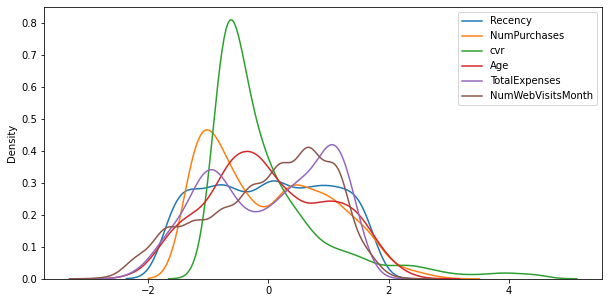

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(0, len(sel)):
  sns.kdeplot(df_std[sel[i]], label = sel[i] )
plt.xlabel('')
plt.legend()
plt.show()

# Data Modeling

## Clustering

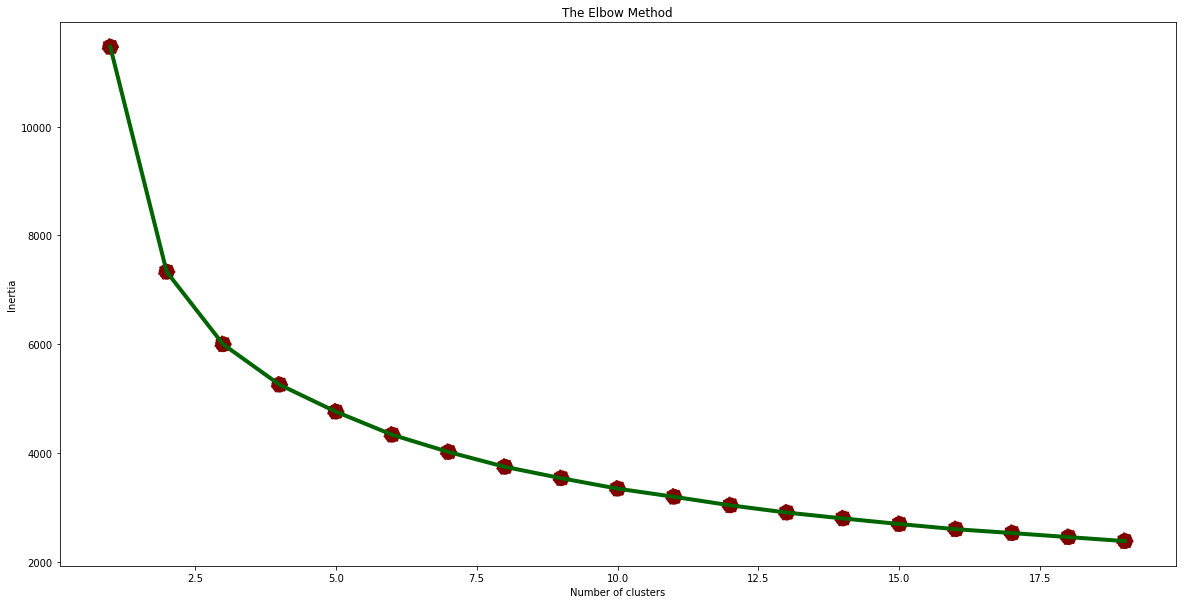

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=50)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
sns.lineplot(x=range(1, 20), y=inertia, color='darkgreen', linewidth = 4)
sns.scatterplot(x=range(1, 20), y=inertia, s=300, color='maroon',  linestyle='--')

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(df_std)
	kmeanModel.fit(df_std)

	distortions.append(sum(np.min(cdist(df_std, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / df_std.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(df_std, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / df_std.shape[0]
	mapping2[k] = kmeanModel.inertia_

for key, val in mapping2.items():
  print(f'{key} : {val}')

1 : 11466.000000000007
2 : 7332.727712787582
3 : 6001.220481861875
4 : 5258.772602091394
5 : 4762.293975027562
6 : 4337.927621645103
7 : 4020.284554034156
8 : 3748.2440603816876
9 : 3542.643885916914


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std)
df_clusters = pd.DataFrame(data=df_std, columns=list(dfc))
df_clusters['clusters'] = kmeans.labels_
df_clusters

Recency  NumPurchases       cvr       Age  TotalExpenses  \
0     0.302978      1.497377  0.028856  1.041450       1.390636   
1    -0.387694     -1.066196 -0.652873  1.301472      -1.463043   
2    -0.802097      0.957677  0.511406  0.348057       0.878699   
3    -0.802097     -0.796346 -0.614543 -1.298751      -0.992748   
4     1.546187      0.687828  0.094565 -1.038728       0.453942   
...        ...           ...       ...       ...            ...   
1906  1.097250     -1.336046 -0.833572 -0.432010      -1.389576   
1907  0.233910      1.092602 -0.094348  1.994865       0.489378   
1908  1.442586      0.687828 -0.087503 -1.038728       1.206093   
1909 -1.423702      1.227527  1.206140  1.128124       0.936445   
1910 -0.318627     -0.391572 -0.546096  1.301472      -0.171889   

      NumWebVisitsMonth  clusters  
0              0.661282         3  
1             -0.283901         2  
2             -0.756493         3  
3              0.188690         2  
4             -0.283901         3  
...                 ...       ...  
1906           0.661282         0  
1907           0.661282         3  
1908           0.188690         3  
1909          -1.229084         1  
1910           0.661282         2  

[1911 rows x 7 columns]

In [ ]:
dfe_clusters = dfe.copy()
dfe_clusters['clusters'] = kmeans.labels_


In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_clusters)
pcs = pca.transform(df_clusters)
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_clusters['clusters']
data_pca.head(10)

PC 1      PC 2  clusters
0  1.892879 -1.184549         3
1 -1.148570 -0.428178         2
2  1.980222 -0.939809         3
3 -1.357291 -0.875858         2
4  0.872556 -0.186670         3
5  1.481875 -1.645600         3
6  1.218657 -1.369834         3
7 -1.147004 -1.190974         2
8 -1.936875 -1.585528         2
9 -2.398976  0.679128         0

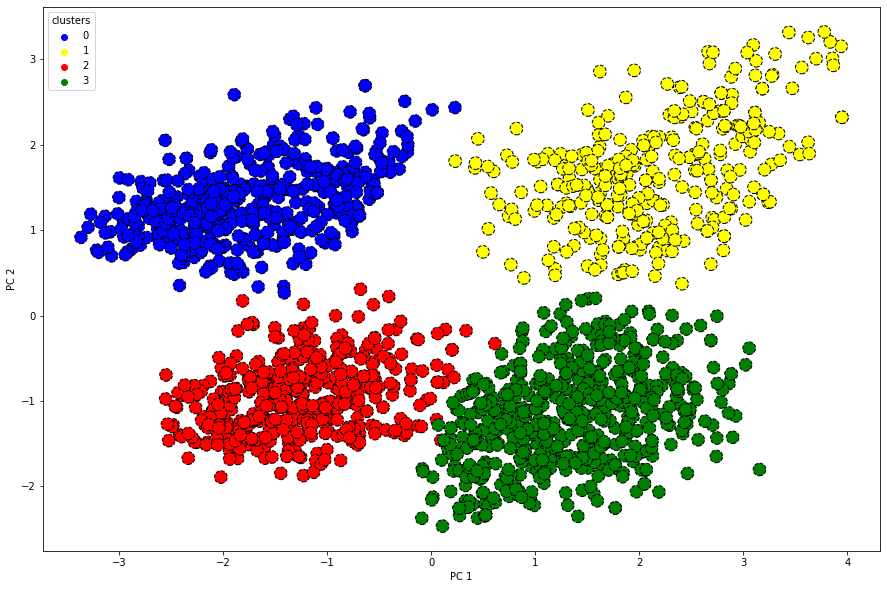

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','yellow','red', 'green'],
    s=160,
    ax=ax
)

## Model Evaluation

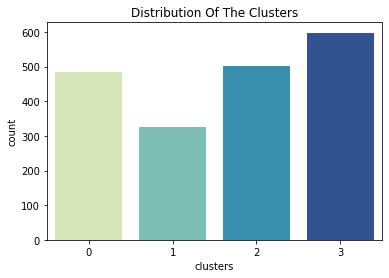

In [ ]:
pl = sns.countplot(x=df_clusters["clusters"], palette= 'YlGnBu')
pl.set_title("Distribution Of The Clusters")
plt.show()

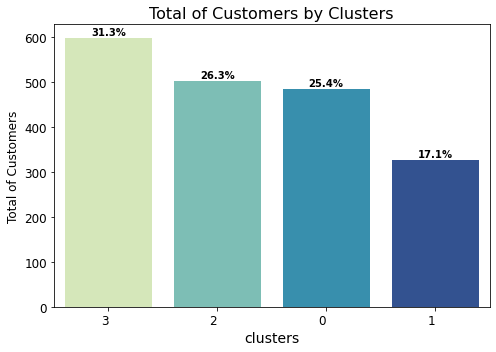

In [ ]:
plt.figure(figsize=(7, 5))
pl = sns.countplot(data = dfe_clusters, x= dfe_clusters["clusters"], order=dfe_clusters["clusters"].value_counts().index, palette= 'YlGnBu')
pl.set_title("Distribution Of The Clusters")
plt.xticks(size=12)
plt.xlabel('clusters', size=14)
plt.yticks(size=12)
plt.ylabel('Total of Customers', size=12)
plt.title('Total of Customers by Clusters' , size=16)
pl.set_xticklabels(pl.get_xticklabels(), rotation=0, ha="right")
total = len(dfe)
for p in pl.patches:
  percentage = f'{100 * p.get_height() / total:.1f}%\n'
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  pl.annotate(percentage, (x,y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
cats = []   #membuat list categorical colums
for i in dfe_clusters.columns:  #untuk setiap i sebagai kolom yang ada di df
    if dfe_clusters[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cats.append(i)

cats

['Education', 'AgeGroup', 'MemberCard', 'IsParent', 'IsMarried']

In [ ]:
cats

['Education', 'AgeGroup', 'MemberCard', 'IsParent', 'IsMarried']

In [ ]:
df_groupby = dfe_clusters.groupby(['clusters','MemberCard']).agg({'IsParent':'count'}).reset_index()

In [ ]:
df_groupby = df_groupby.rename(columns={'IsParent':'TotalCustomers'})
df_groupby

clusters MemberCard  TotalCustomers
0          0     Bronze             313
1          0       Gold               3
2          0   Platinum               1
3          0     Silver             168
4          1     Bronze               1
5          1       Gold              99
6          1   Platinum             189
7          1     Silver              37
8          2     Bronze             380
9          2     Silver             122
10         3       Gold             234
11         3   Platinum             177
12         3     Silver             187

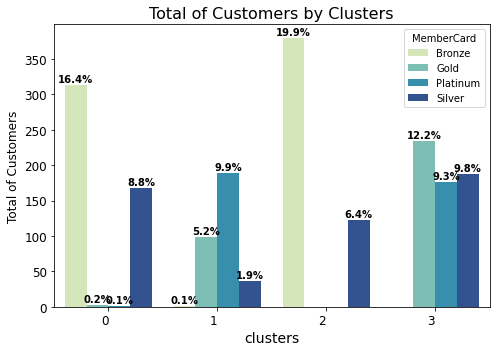

In [ ]:
plt.figure(figsize=(7, 5))
pl = sns.barplot(data=df_groupby, 
                   x=df_groupby['clusters'], 
                   y = df_groupby['TotalCustomers'],
                   hue= df_groupby['MemberCard'], 
                   ci = 0,
                   palette= 'YlGnBu')
pl.set_title("Distribution Of The Clusters")
plt.xticks(size=12)
plt.xlabel('clusters', size=14)
plt.yticks(size=12)
plt.ylabel('Total of Customers', size=12)
plt.title('Total of Customers by Clusters' , size=16)
pl.set_xticklabels(pl.get_xticklabels(), rotation=0, ha="right")
total = len(dfe)
for p in pl.patches:
  percentage = f'{100 * p.get_height() / total:.1f}%\n'
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  pl.annotate(percentage, (x,y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

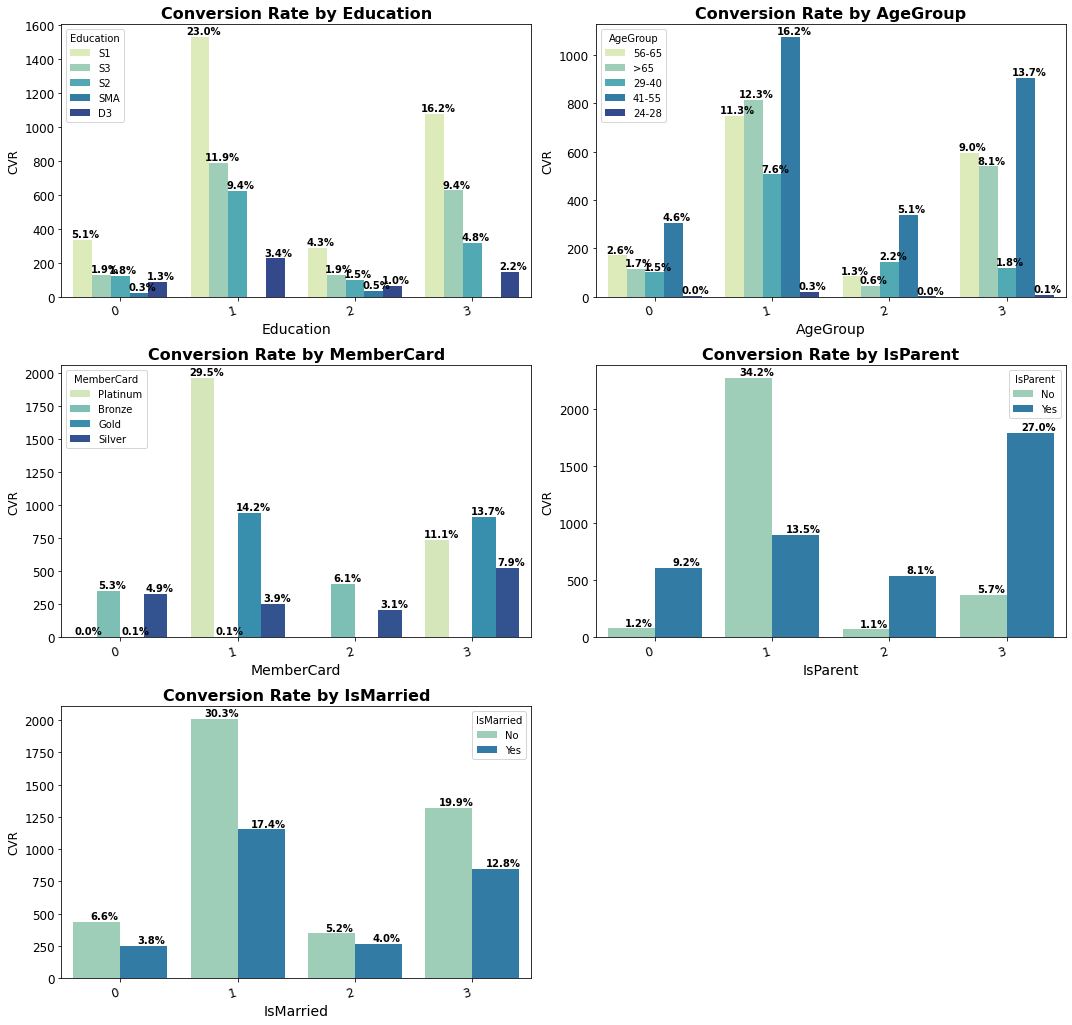

In [ ]:
plt.figure(figsize=(15, 28))
for i in range(0, len(cats)):
  plt.subplot (6, 2, i+1)
  ax = sns.barplot(data=dfe, 
                   x=dfe_clusters['clusters'], 
                   y = dfe_clusters['cvr'], 
                   ci = 0,
                   estimator = np.sum,
                   hue = dfe[cats[i]],
                   palette= 'YlGnBu')
  plt.xticks(size=12)
  plt.xlabel(cats[i], size=14)
  plt.yticks(size=12)
  plt.ylabel('CVR', size=12)
  plt.title('Conversion Rate by ' + cats[i], size=16, weight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
  total = dfe['cvr'].sum()
  for p in ax.patches:
    percentage = f'{ 100* p.get_height()/total :.1f}%\n'
    x = p.get_x() + p.get_width() / (2-0.5)
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
nums = []   #membuat list numerical column
for i in dfe.columns:  #untuk setiap i sebagai kolom yang ada di df
    if dfe[i].dtypes == 'float' or dfe[i].dtypes == 'int' :  #jika kolom di df bertipe object maka dianggap sebagai categorical column
        nums.append(i)
nums.remove('Response')
nums.remove('Complain')
nums.remove('AcceptedCmp1')
nums.remove('AcceptedCmp2')
nums.remove('AcceptedCmp3')
nums.remove('AcceptedCmp4')
nums.remove('AcceptedCmp5')
nums.remove('ChildrenHome')
nums.remove('TotalAcceptedCmp')
nums.remove('YearsJoined')
nums.remove('Year_Birth')
nums.remove('ID')


nums

['Income',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'NumPurchases',
 'cvr',
 'Age',
 'TotalExpenses']

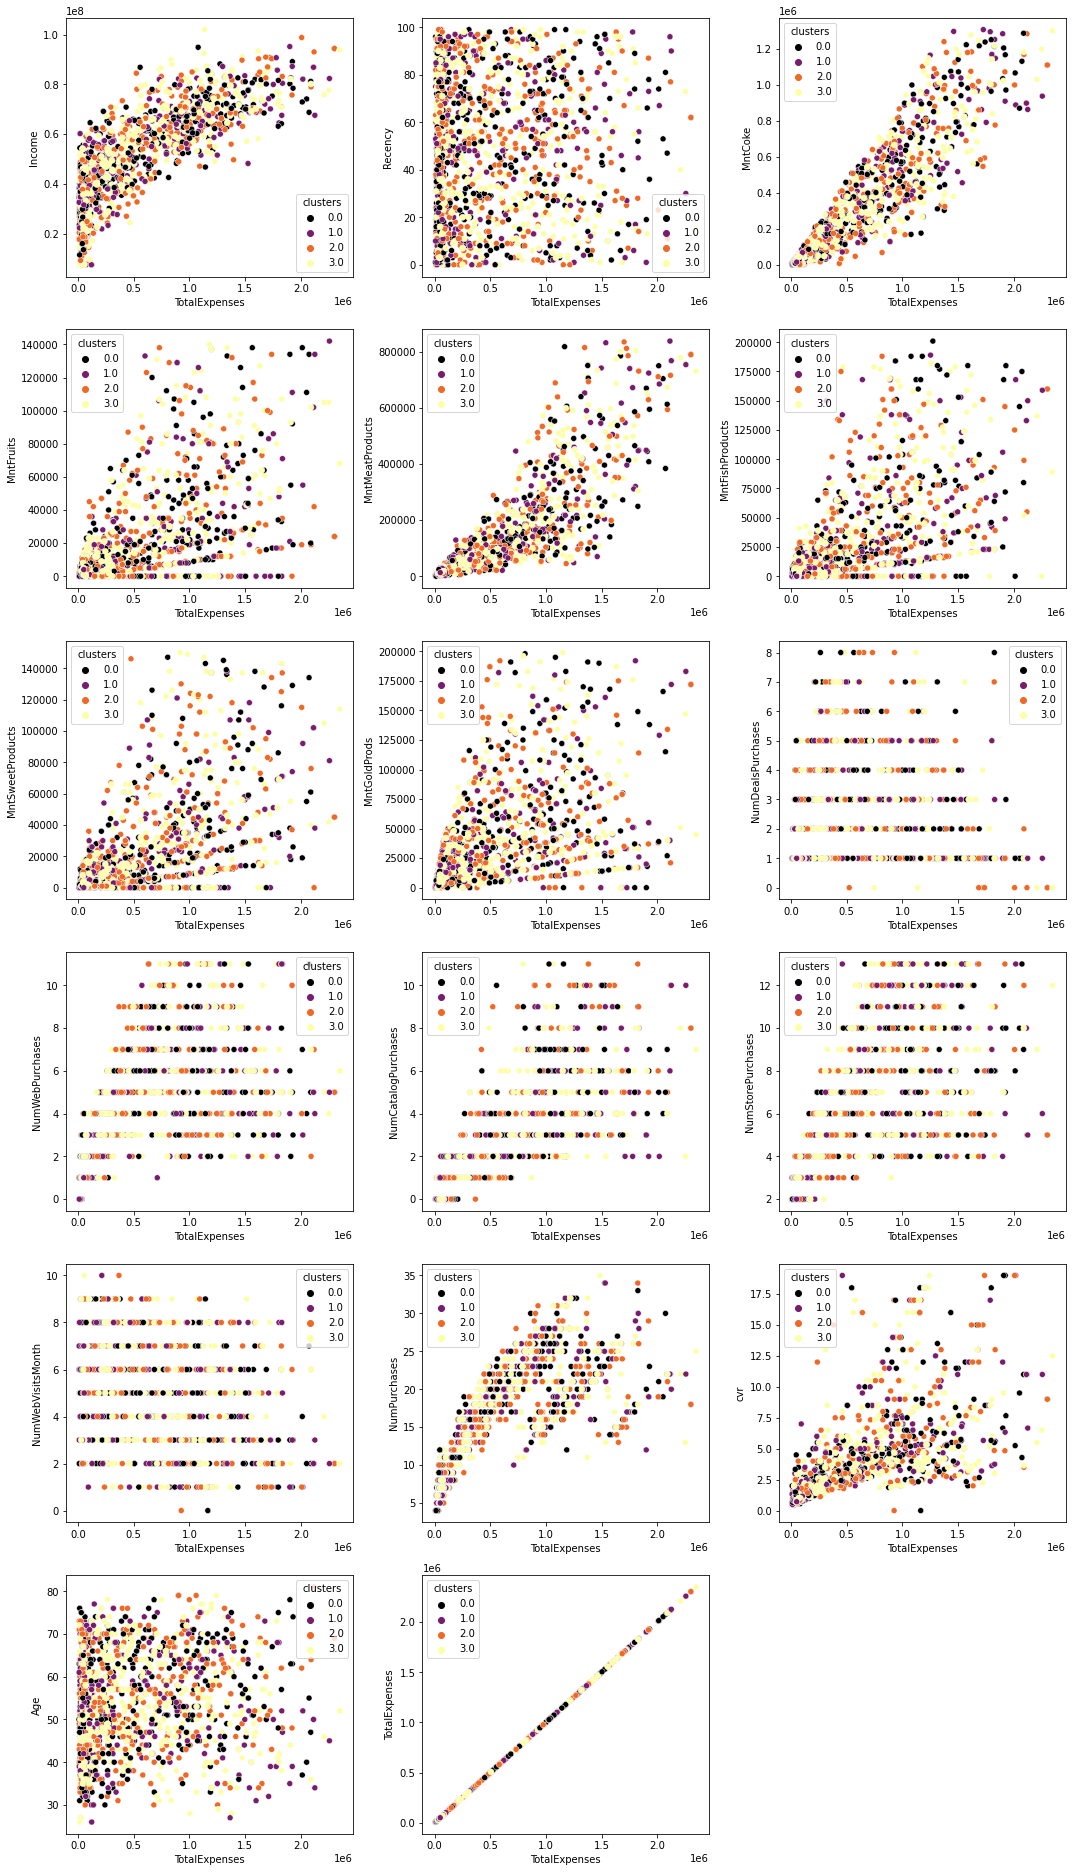

In [ ]:
# plt.subplots(figsize=(15,10))
# pl = sns.scatterplot(data = dfe,x=dfe["TotalExpenses"], y=dfe["Income"],hue=df_clusters["clusters"], palette= 'inferno')
# pl.set_title("Cluster's Profile Based On Income And Total Expenses")
# plt.legend()
# plt.show()

plt.figure(figsize=(15, 30))
for i in range (0, len(nums)):
  plt.subplot(7, 3, i+1)
  sns.scatterplot(data = dfe,x=dfe['TotalExpenses'], y=dfe[nums[i]],hue=df_clusters["clusters"], palette= 'inferno')
  plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

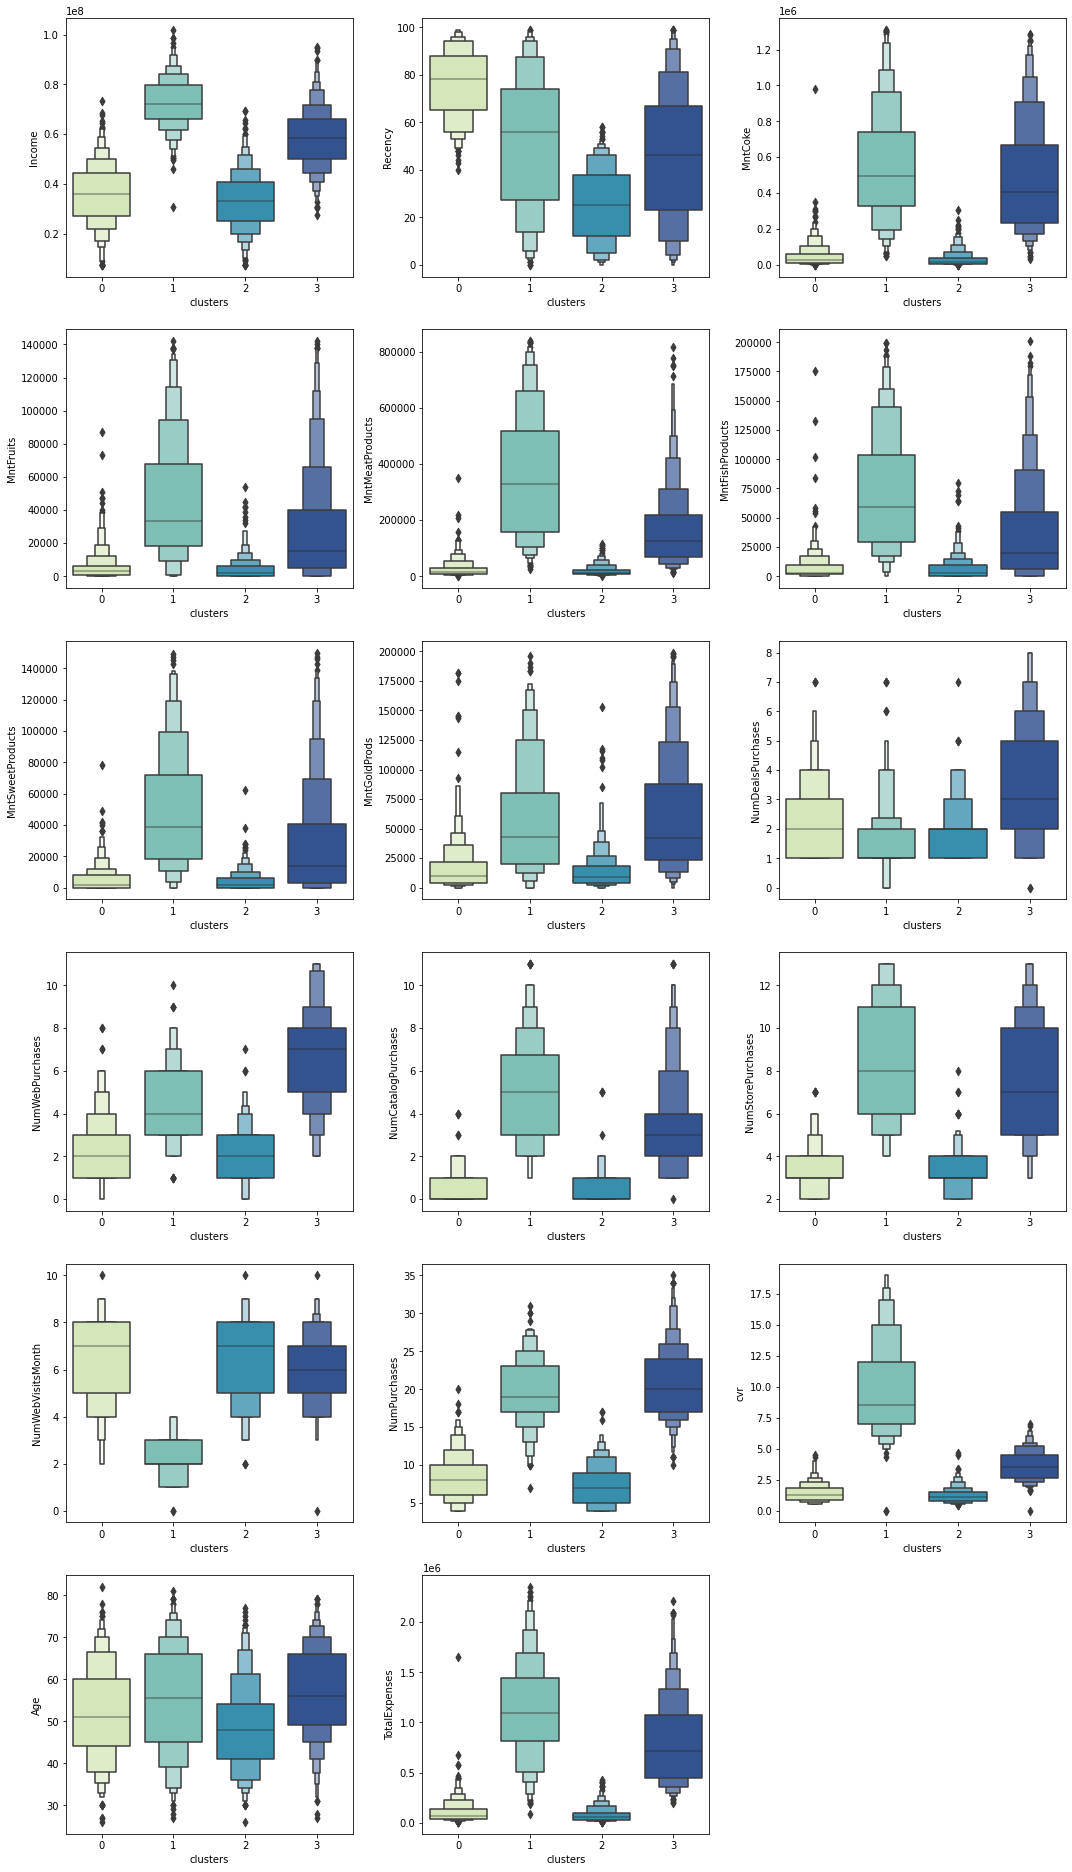

In [ ]:
plt.figure(figsize=(15, 30))
for i in range (0, len(nums)):
  plt.subplot(7, 3, i+1)
  sns.boxenplot(x = dfe_clusters['clusters'] , y = dfe[nums[i]] , palette = 'YlGnBu', orient = 'v')
  plt.tight_layout()
plt.savefig('boxenplot.png')
files.download('boxenplot.png')

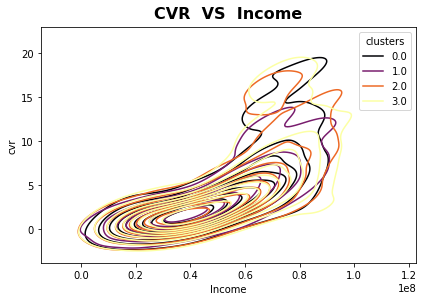

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data = dfe,x=dfe['Income'], y=dfe['cvr'],hue=df_clusters["clusters"], palette= 'inferno')
plt.tight_layout()
plt.title('CVR  ' + 'VS  ' + 'Income', size=16, weight='bold', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

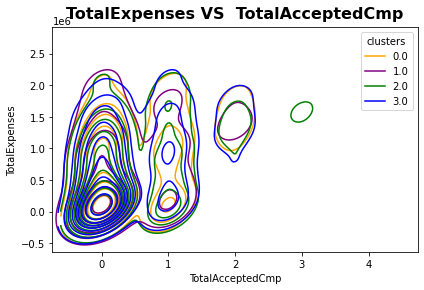

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data = dfe,x=dfe['TotalAcceptedCmp'], y=dfe['TotalExpenses'],hue=df_clusters["clusters"], palette= ['orange','purple','green','blue'])
plt.tight_layout()
plt.title('TotalExpenses ' + 'VS  ' + 'TotalAcceptedCmp', size=16, weight='bold', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()

<Figure size 432x288 with 0 Axes>

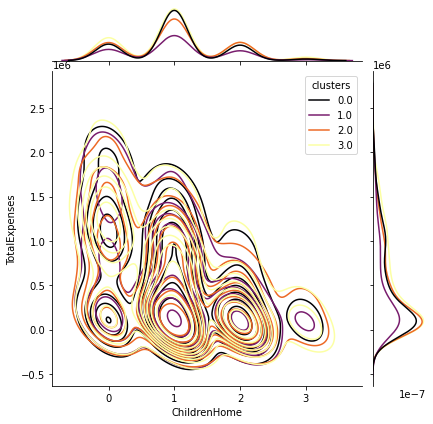

<Figure size 432x288 with 0 Axes>

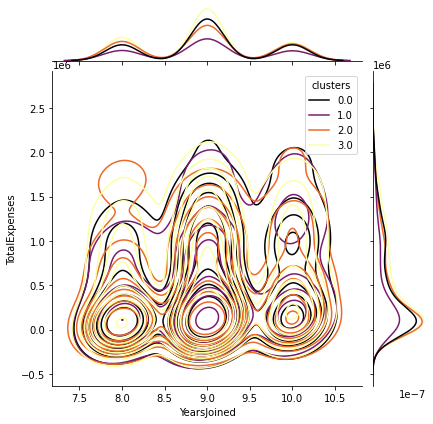

<Figure size 432x288 with 0 Axes>

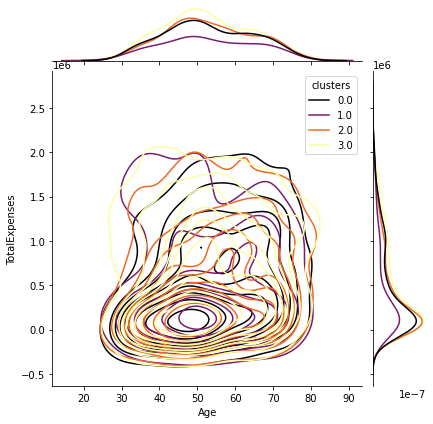

<Figure size 432x288 with 0 Axes>

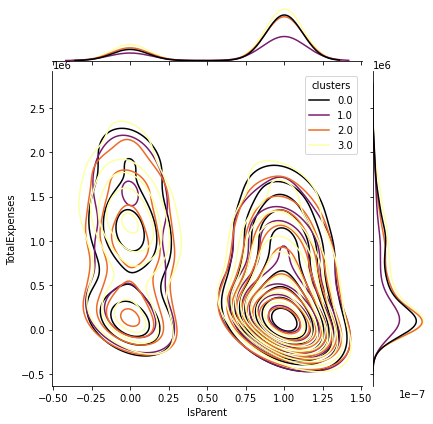

<Figure size 432x288 with 0 Axes>

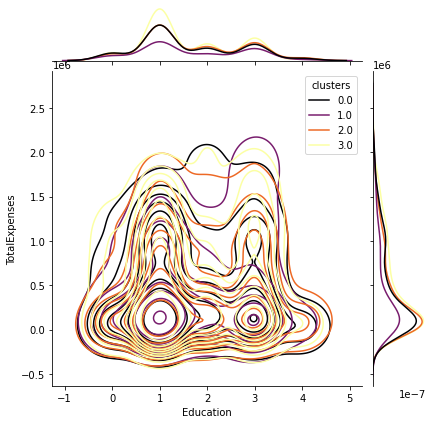

<Figure size 432x288 with 0 Axes>

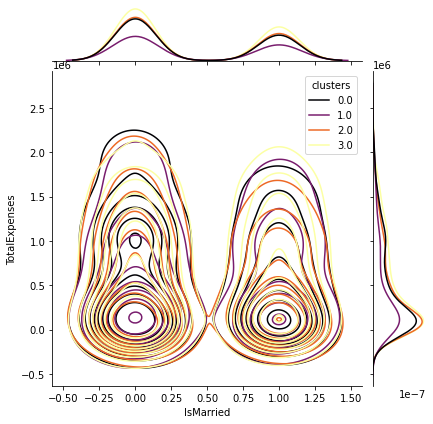

In [ ]:
Personal = [ "ChildrenHome","YearsJoined", "Age","IsParent", "Education","IsMarried"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_enc[i], y=dfe["TotalExpenses"], hue =df_clusters["clusters"], kind="kde",  palette = 'inferno')
    plt.show()

In [ ]:
display(dfe_clusters[sel].groupby(dfe_clusters['clusters']).agg(['mean','median', 'max', 'min']))


Recency                NumPurchases                      cvr  \
               mean median max min         mean median max min      mean   
clusters                                                                   
0         76.282474   78.0  99  40     8.284536    8.0  20   4  1.423035   
1         52.579755   56.0  99   0    19.644172   19.0  31   7  9.705266   
2         25.262948   25.0  58   0     7.334661    7.0  17   4  1.218301   
3         45.571906   46.0  99   0    20.841137   20.0  35  10  3.624585   

                                               Age                 \
            median        max       min       mean median max min   
clusters                                                            
0         1.222222   4.500000  0.500000  51.787629   51.0  82  26   
1         8.500000  19.000000  0.000000  55.251534   55.5  81  27   
2         1.125000   4.666667  0.444444  48.350598   48.0  77  26   
3         3.500000   7.000000  0.000000  56.608696   56.0  79  27   

         TotalExpenses                             NumWebVisitsMonth         \
                  mean     median      max     min              mean median   
clusters                                                                      
0         1.104392e+05    68000.0  1651000    8000          6.367010    7.0   
1         1.127206e+06  1092000.0  2349000   92000          2.245399    2.0   
2         8.118725e+04    57000.0   426000    8000          6.482072    7.0   
3         7.994064e+05   720000.0  2209000  195000          6.068562    6.0   

                  
         max min  
clusters          
0         10   2  
1          4   0  
2         10   2  
3         10   0

In [ ]:
display(df_enc[Personal].groupby(dfe_clusters['clusters']).agg(['mean','median', 'max', 'min']))


ChildrenHome                YearsJoined                       Age  \
                 mean median max min        mean median max min       mean   
clusters                                                                     
0            1.280412    1.0   3   0    8.872165    9.0  10   8  51.787629   
1            0.371166    0.0   2   0    8.846626    9.0  10   8  55.251534   
2            1.201195    1.0   3   0    8.876494    9.0  10   8  48.350598   
3            1.041806    1.0   3   0    9.185619    9.0  10   8  56.608696   

                         IsParent                Education                 \
         median max min      mean median max min      mean median max min   
clusters                                                                    
0          51.0  82  26  0.886598    1.0   1   0  1.519588    1.0   4   0   
1          55.5  81  27  0.346626    0.0   1   0  1.644172    1.0   3   0   
2          48.0  77  26  0.880478    1.0   1   0  1.643426    1.0   4   0   
3          56.0  79  27  0.837793    1.0   1   0  1.652174    1.0   3   0   

         IsMarried                 
              mean median max min  
clusters                           
0         0.356701    0.0   1   0  
1         0.368098    0.0   1   0  
2         0.432271    0.0   1   0  
3         0.392977    0.0   1   0